<a href="https://colab.research.google.com/github/MonikaGost/Winc/blob/master/Final_assignment/Final_assignment_Part1_CO2_predictors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1: What is the biggest predictor of a large CO2 output per capita of a country?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **1. Production-CO2 per capita per country**

---



In [68]:
df1 = pd.read_csv("https://raw.githubusercontent.com/MonikaGost/Winc/master/Final_assignment/co-emissions-per-capita.csv")

In [69]:
#df1
df1.rename(columns= {"Annual CO₂ emissions (per capita)":"Annual CO₂"}, inplace=True)
df1.drop(columns = "Code", inplace=True)
df1.isnull().sum() # Looks there are no default missing values
df1.set_index("Entity",inplace=True) # setting country names as index

In [ ]:
uv = df1.index.unique()
display(len(uv)) # we have 237 unique 'country' names
display(list(uv)) # not all of these values are actual cuntries, so i remove them from the list

In [71]:
no_countries = ["Africa","Asia","Asia (excl. China and India)",'Europe','Europe (excl. EU-27)',
'Europe (excl. EU-28)','European Union (27)','European Union (28)','High-income countries','Low-income countries',
'Lower-middle-income countries','North America','North America (excl. USA)','Oceania','South America','Upper-middle-income countries','World']
df1.drop(index=no_countries,axis=0,inplace=True)
 # we have 220 countries left

In [72]:
df1

,Year,Annual CO₂
Entity,,
Afghanistan,1949,0.00
Afghanistan,1950,0.01
Afghanistan,1951,0.01
Afghanistan,1952,0.01
Afghanistan,1953,0.01
...,...,...
Zimbabwe,2017,0.65
Zimbabwe,2018,0.78
Zimbabwe,2019,0.72


In [ ]:
co2_capita_2021 = df1.loc[df1["Year"]==2021]
co2_capita_2021.sort_values(by="Annual CO₂",inplace=True, ascending=False)
df1_top_20 = co2_capita_2021.head(20)
df1_bottom_20 = co2_capita_2021.tail(20)
display(df1_top_20)
display(df1_bottom_20)

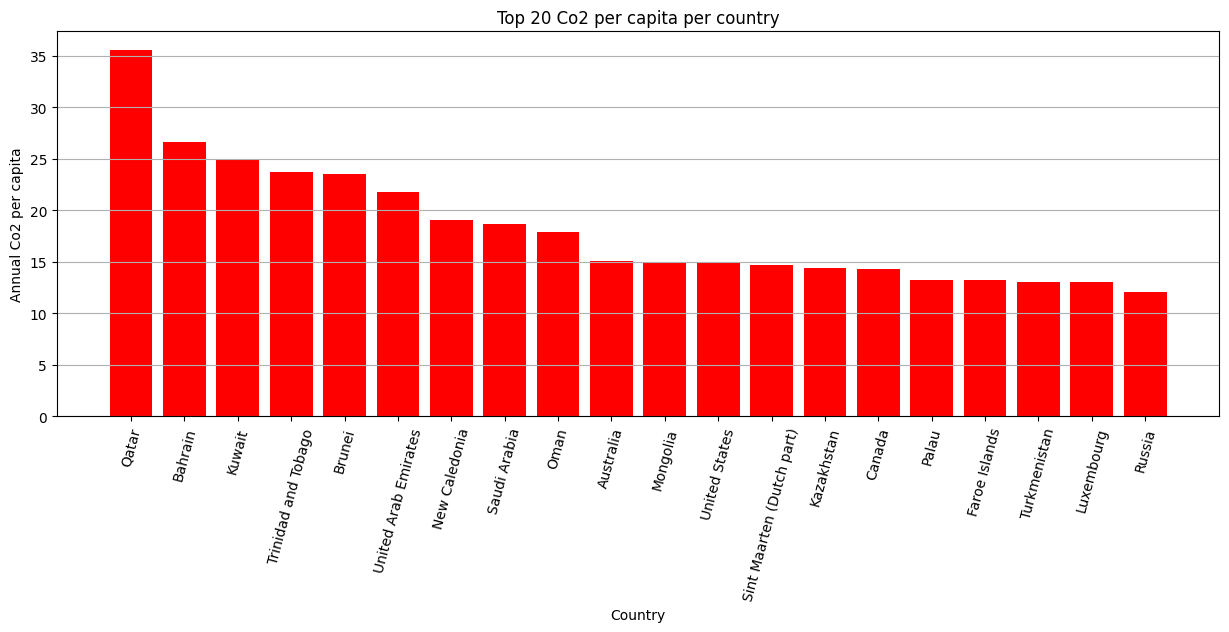

In [ ]:
fig, ax = plt.subplots()

x = df1_top_20.index
y = df1_top_20["Annual CO₂"]

ax.bar(x, y, color="red")

plt.xlabel("Country")
plt.ylabel("Annual Co2 per capita")
plt.title("Top 20 Co2 per capita per country")

ax.grid(True, axis="y")
plt.xticks(rotation=75)
fig.set_size_inches(15,5)
plt.show()


In [ ]:
df1_bottom_20.sort_values(by="Annual CO₂",inplace=True, ascending=True)
fig, ax = plt.subplots()
x2 = df1_bottom_20.index
y2 = df1_bottom_20["Annual CO₂"]

ax.bar(x2, y2)

plt.xlabel("Country")
plt.ylabel("Annual Co2 per capita")
plt.title("Countries with lowest Co2 output per capita in 2020")

ax.grid(True, axis="y")
plt.xticks(rotation=75)
fig.set_size_inches(15,5)
plt.show()

### **2. Consumption-CO2 per capita of a country**

**Inspecting and cleaning up data set**

---



In [15]:
df2 = pd.read_csv("https://raw.githubusercontent.com/MonikaGost/Winc/master/Final_assignment/consumption-co2-per-capita.csv")

In [16]:
df2.rename(columns= {"Annual consumption-based CO₂ emissions (per capita)":"Annual CO₂"}, inplace=True)
df2.drop(columns = "Code", inplace=True)
df2.set_index("Entity",inplace=True)

In [ ]:
df2_unique = df2.index.unique()
display(len(df2_unique)) # we have 137 unique 'country' names but some of them aren't countries, I remove these rows in next step
display(list(df2_unique)) # we have 120 countries left

In [18]:
df2_drop = ['Asia','Asia (excl. China and India)','Africa','Europe','Europe (excl. EU-27)','Europe (excl. EU-28)','European Union (27)',
            'European Union (28)','High-income countries','Low-income countries','Lower-middle-income countries','North America',
            'North America (excl. USA)','Oceania','South America','Upper-middle-income countries','World']
df2.drop( index = df2_drop, axis=0, inplace=True)
df2

,Year,Annual CO₂
Entity,,
Albania,1990,1.685726
Albania,1991,1.396741
Albania,1992,0.881990
Albania,1993,0.809166
Albania,1994,0.719588
...,...,...
Zimbabwe,2016,0.825971
Zimbabwe,2017,0.712244
Zimbabwe,2018,0.834868


**Filtering by most recent year**

In [ ]:
df2.isnull().sum()
df2.Year.unique()
df2_2020 = df2.loc[df2["Year"]==2020]
df2_2020

**Finding top and bottom 20 countries with respectively highest and lowest CO2 output per capita**

In [ ]:
df2_2020.sort_values(by="Annual CO₂",inplace=True, ascending=False)
df2_top20 = df2_2020.head(20).copy()
df2_bottom20 = df2_2020.tail(20).copy()
display(df2_top20)
display(df2_bottom20)

**Plotting results**

* **Top countries**

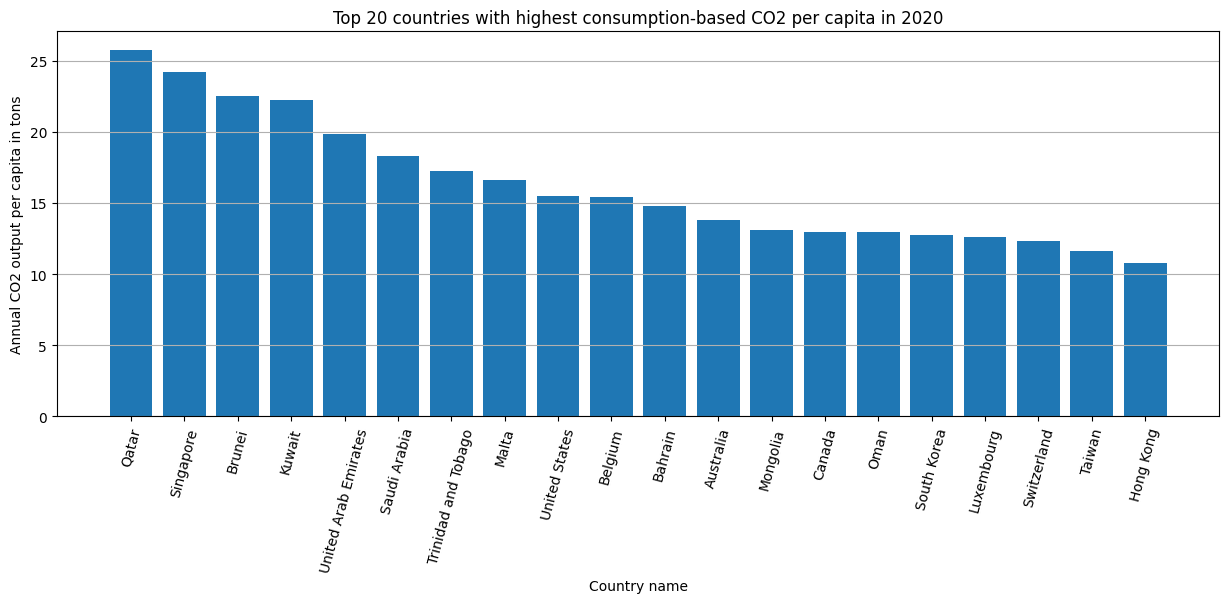

In [ ]:
fig, ax = plt.subplots()
x4 = df2_top20.index
y4 = df2_top20["Annual CO₂"]

ax.bar(x4, y4)

plt.xlabel("Country name")
plt.ylabel("Annual CO2 output per capita in tons")
plt.title("Top 20 countries with highest consumption-based CO2 per capita in 2020")

ax.grid(True, axis="y")
plt.xticks(rotation=75)
fig.set_size_inches(15,5)
plt.show()

* **Bottom 20 countries**

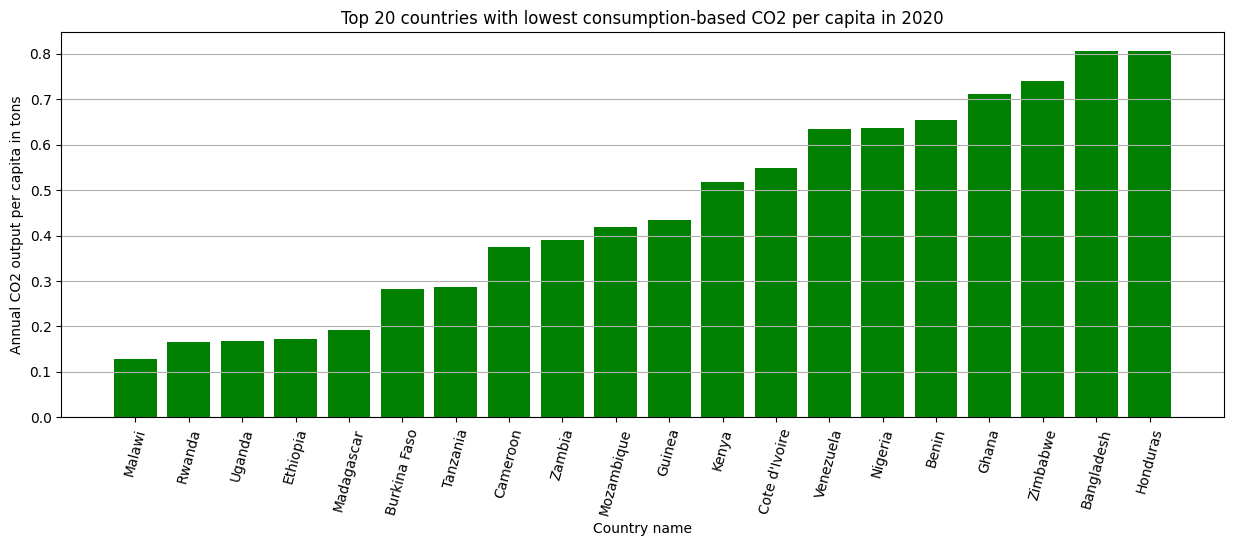

In [ ]:
df2_bottom20.sort_values(by="Annual CO₂", ascending=True, inplace=True)

fig, ax = plt.subplots()
x5 = df2_bottom20.index
y5 = df2_bottom20["Annual CO₂"]

ax.bar(x5, y5, color="green")

plt.xlabel("Country name")
plt.ylabel("Annual CO2 output per capita in tons")
plt.title("Top 20 countries with lowest consumption-based CO2 per capita in 2020")

ax.grid(True, axis="y")
plt.xticks(rotation=75)
fig.set_size_inches(15,5)
plt.show()

### **3. Population data per country**

---



**Preparing and cleaning data set**

In [ ]:
df3 = pd.read_csv("https://raw.githubusercontent.com/MonikaGost/Winc/master/Final_assignment/population-and-demography.csv")
display(df3)

In [ ]:
population = df3.loc[:,"Country name":"Population"]

population.set_index("Country name",inplace=True)
population.sort_values(by="Population", ascending=False, inplace=True)
#display(population)

unique_population = population.index.unique()
display(len(unique_population)) # we have 254 unique 'country' names
display(list(unique_population)) # There are some "no countries" on the list, I remove them in next step.

In [ ]:
display(df3)

In [ ]:
df3_drop = ['World','Less developed regions','Less developed regions, excluding least developed countries','Less developed regions, excluding China',
            'Asia (UN)','Lower-middle-income countries','Upper-middle-income countries','Africa (UN)','More developed regions','High-income countries',
            'Least developed countries','Europe (UN)','Low-income countries','Latin America and the Caribbean (UN)','Land-locked developing countries (LLDC)',
            'Northern America (UN)','Oceania (UN)','Small island developing states (SIDS)']
population.drop( index = df3_drop, axis=0, inplace=True)
unique_population = population.index.unique()
display(len(unique_population)) # we have 237 unique country names left

236

In [ ]:
population.sort_values(by="Population",ascending=False,inplace=True)

**Zooming in on year 2020 and top 20 countries**

In [ ]:
population2020 = population.loc[population["Year"]==2020]
top20_population = population2020.head(20)
top20_population

**Making plot**

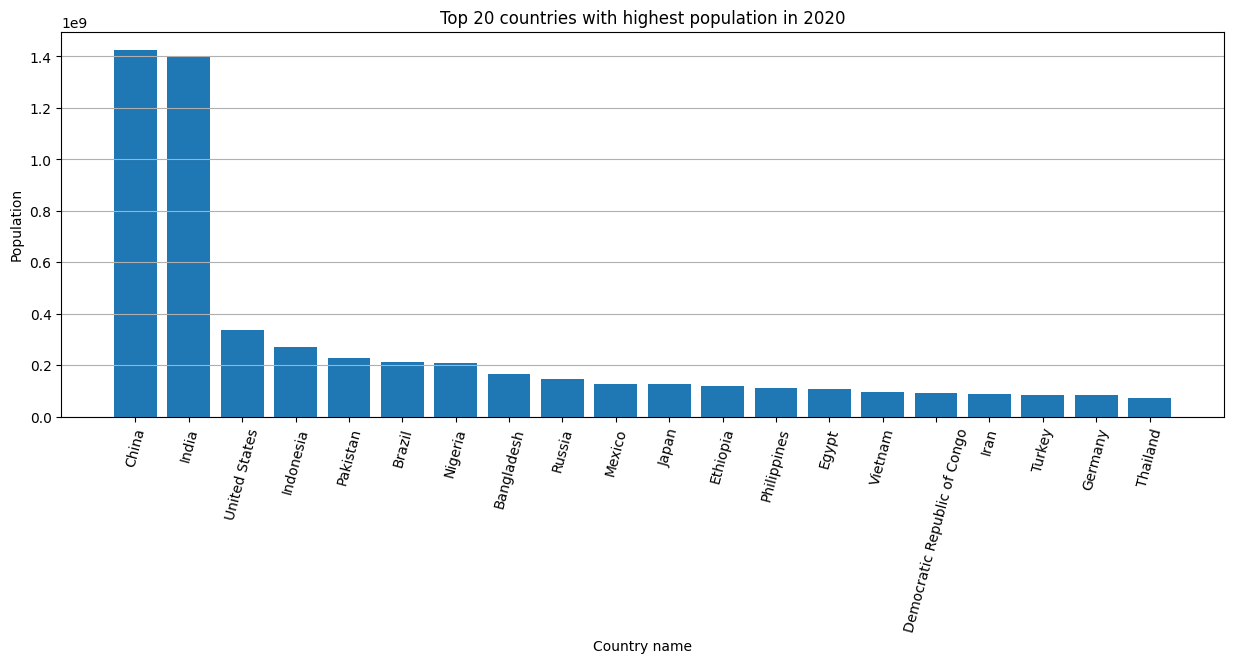

In [ ]:
fig, ax = plt.subplots()
x3 = top20_population.index
y3 = top20_population["Population"]

ax.bar(x3, y3)

plt.xlabel("Country name")
plt.ylabel("Population")
plt.title("Top 20 countries with highest population in 2020")

ax.grid(True, axis="y")
plt.xticks(rotation=75)
fig.set_size_inches(15,5)
plt.show()

### **4. Global CO2 emissions per country**

---



**Preparing and cleaning data set**

In [2]:
df4 = pd.read_csv("https://raw.githubusercontent.com/MonikaGost/Winc/master/Final_assignment/annual-co-emissions-by-region.csv")

In [ ]:
display(df4)
df4.rename(columns= {"Annual CO₂ emissions":"CO₂"}, inplace=True)
df4.drop(columns = "Code", inplace=True)
df4.set_index("Entity",inplace=True)

In [ ]:
df4_unique = df4.index.unique()
display(len(df4_unique)) # we have 258 unique 'country' names but some of them aren't countries, I remove these rows in next step
display(list(df4_unique))


In [5]:
# Removing no countries:
df4_drop = ['Africa','Africa (GCP)','Asia','Asia (GCP)','Asia (excl. China and India)','Europe','Europe (GCP)','Europe (excl. EU-27)',
 'Europe (excl. EU-28)','European Union (27)','European Union (27) (GCP)','European Union (28)','Central America (GCP)','French Equatorial Africa (GCP)',
 'French West Africa (GCP)','High-income countries','International transport','Kuwaiti Oil Fires (GCP)','Low-income countries','Lower-middle-income countries',
 'Middle East (GCP)','Non-OECD (GCP)','North America','North America (GCP)','North America (excl. USA)','OECD (GCP)','Oceania','Oceania (GCP)','South America',
 'South America (GCP)','Upper-middle-income countries','World']
df4.drop( index = df4_drop, axis=0, inplace=True)

In [ ]:
df4_unique = df4.index.unique()
display(len(df4_unique)) # we have 226 unique country names left
display(list(df4_unique))

In [ ]:
Co2 = pd.pivot_table(df4, values="CO₂", index=["Entity"], columns=["Year"]) # this creates some missing values
list(Co2.isna().sum())# there are many data missing for certain years for many countries. These are 207-100 records per year missing,mostly from 18th and 19th century.
# I will analyze data of most recent 20 years as there are most avaiable data in those years so we can compare as many countries as possible.

**Zooming into 20 recent years and top 20 countries**

In [ ]:
Co2_last20 = Co2.loc[:,2000:2021]
#list(Co2_last20.isna().sum())
Co2_top20 = pd.DataFrame(Co2_last20.copy())
Co2_top20.sort_values(by=2020, ascending=False, inplace=True)

In [ ]:
Co2_top20.dropna(how="all", inplace=True) # dropping rows with all mising data

In [ ]:
pd.options.display.float_format = '{0:,.0f}'.format # changing format for better overview
Co2_top20.head(20)

In [ ]:
CO2_graph = Co2_top20.head(10)

**Plotting results**

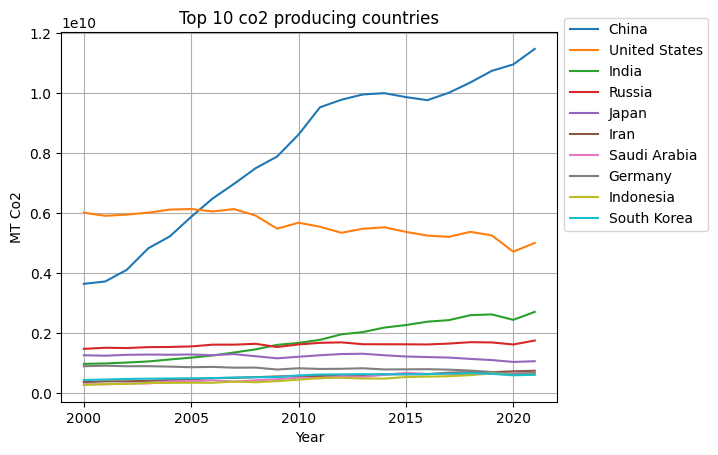

In [ ]:
fig, ax = plt.subplots()
years = Co2_top20.columns


for index, row in CO2_graph.iterrows():
    plt.plot(years, row, label = index)

plt.title("Top 10 co2 producing countries")
plt.xlabel("Year")
plt.ylabel("MT Co2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.grid()

plt.show()

### **5. Looking at biggest changers (where the CO2 output per capita increased most)**

---



In [ ]:
df2
consumptionCO2=pd.pivot_table(df2, values=["Annual CO₂"], index=["Entity"], columns=["Year"])
consumptionCO2.columns

In [30]:
# I look for countries with biggest grow of co2 emissions. For this reason I compare first and last year of datatable and calculate absolute and relative change.
# Then I sort the values by relative change
cons_co2change= consumptionCO2.loc[:,[('Annual CO₂',1990),('Annual CO₂', 2020)]].copy()
cons_co2change

cons_co2change["Absolute_change"] = cons_co2change[('Annual CO₂', 2020)] - cons_co2change[('Annual CO₂', 1990)]
cons_co2change["Relative_change"] = ((cons_co2change[('Annual CO₂', 2020)]-cons_co2change[('Annual CO₂', 1990)])/cons_co2change[('Annual CO₂', 1990)])*100

In [32]:
cons_co2change

Annual CO₂            Absolute_change Relative_change
Year            1990       2020                                
Entity                                                         
Albania     1.685726   2.014620        0.328894       19.510508
Argentina   3.432985   3.534910        0.101925        2.968994
Armenia     1.683040   2.586914        0.903874       53.704861
Australia  14.263723  13.811205       -0.452518       -3.172510
Austria    11.629516   9.118348       -2.511168      -21.593057
...              ...        ...             ...             ...
Uruguay     1.574974   2.953206        1.378232       87.508213
Venezuela   4.762998   0.634271       -4.128727      -86.683368
Vietnam     0.348098   2.107940        1.759842      505.559655
Zambia      0.355850   0.390579        0.034729        9.759396
Zimbabwe    1.779758   0.741153       -1.038605      -58.356529

[120 rows x 4 columns]

In [33]:
#cons_biggest_changers = cons_co2change.sort_values(by="Absolute_change", ascending=False)
#cons_biggest_changers = cons_co2change.sort_values(by="Relative_change", ascending=False) # this doesn't work for me as we have countries with total small emission on the top
cons_biggest_changers = cons_co2change.sort_values(by=[('Annual CO₂', 2020),"Relative_change"], ascending=False) # now sorted by bigger emissions first

In [34]:
cons_biggest_changers.head(20)

Annual CO₂            Absolute_change Relative_change
Year                       1990       2020                                
Entity                                                                    
Qatar                 24.284792  25.771225        1.486433        6.120839
Singapore             23.548970  24.238316        0.689346        2.927287
Brunei                16.566265  22.549650        5.983385       36.117888
Kuwait                23.354385  22.231573       -1.122812       -4.807714
United Arab Emirates  29.460331  19.848060       -9.612271      -32.627845
Saudi Arabia          12.099707  18.277689        6.177982       51.058939
Trinidad and Tobago    9.274585  17.252722        7.978137       86.021499
Malta                  9.216151  16.612299        7.396148       80.252027
United States         20.347502  15.471116       -4.876386      -23.965527
Belgium               15.542700  15.392110       -0.150590       -0.968879
Bahrain               22.448511  14.774931       -7.673580      -34.183024
Australia             14.263723  13.811205       -0.452518       -3.172510
Mongolia               4.123725  13.114191        8.990466      218.018047
Canada                17.463978  12.950360       -4.513618      -25.845303
Oman                   6.947714  12.928992        5.981278       86.089871
South Korea            7.257062  12.720634        5.463572       75.286280
Luxembourg            31.010040  12.642754      -18.367286      -59.230127
Switzerland           12.773527  12.356116       -0.417411       -3.267782
Taiwan                 8.498589  11.645683        3.147094       37.030774
Hong Kong             14.766979  10.770679       -3.996300      -27.062411

In [35]:
cons_biggest_changers.tail(20)

Annual CO₂           Absolute_change Relative_change
Year                1990      2020                                
Entity                                                            
Honduras        0.658257  0.807134        0.148877       22.616926
Bangladesh      0.170461  0.806913        0.636452      373.370974
Zimbabwe        1.779758  0.741153       -1.038605      -58.356529
Ghana           0.314202  0.712511        0.398309      126.768400
Benin           0.181306  0.654032        0.472727      260.734923
Nigeria         0.398535  0.637452        0.238917       59.948772
Venezuela       4.762998  0.634271       -4.128727      -86.683368
Cote d'Ivoire   0.499009  0.549218        0.050209       10.061727
Kenya           0.347884  0.517680        0.169796       48.808112
Guinea          0.157997  0.434916        0.276919      175.268470
Mozambique      0.299572  0.419897        0.120325       40.165423
Zambia          0.355850  0.390579        0.034729        9.759396
Cameroon        0.263287  0.375609        0.112323       42.661664
Tanzania        0.138660  0.286114        0.147454      106.342318
Burkina Faso    0.088063  0.282032        0.193969      220.260449
Madagascar      0.116756  0.192952        0.076196       65.260494
Ethiopia        0.082021  0.173066        0.091044      111.001091
Uganda          0.086252  0.168295        0.082043       95.119990
Rwanda          0.071566  0.164601        0.093034      129.996695
Malawi          0.160256  0.127859       -0.032397      -20.215935

### **6. GDP per capita and its relation to CO2 output**

---



  * **Inspecting and cleaning the data set**

---



In [37]:
df5 = pd.read_csv("https://raw.githubusercontent.com/MonikaGost/Winc/master/Final_assignment/co2-emissions-and-gdp-per-capita.csv")
# source: https://ourworldindata.org/grapher/co2-emissions-and-gdp-per-capita?tab=table&time=1992..latest&country=~GBR


In [38]:
pd.options.display.float_format = '{:.2f}'.format # this format will be better here

In [ ]:
display(df5)
df5.set_index("Entity",inplace=True) # setting index

In [40]:
# Dropping and renaming columns for a better overview
df5.drop(columns="Code", inplace=True)
df5.columns
df5.rename(columns= {"GDP per capita, PPP (constant 2017 international $)":"GDP",
                     "Annual CO₂ emissions (per capita)":"Prod_CO₂",
                     "Annual consumption-based CO₂ emissions (per capita)":"Cons_CO₂"}, inplace=True)
df5.dropna(inplace=True) # dropping rows with empty values

In [ ]:
#dropping rows with "no country" values
df5_unique = df5.index.unique()
display(len(df5_unique)) # we have 124 unique "country-like" names
display(list(df5_unique))

In [42]:
df5_drop = ['European Union (27)','High-income countries','Low-income countries','Lower-middle-income countries','Upper-middle-income countries','World']
df5.drop(index = df5_drop, axis=0, inplace=True)

In [ ]:
df5_unique = df5.index.unique()
display(len(df5_unique)) # we have 118 unique country names left
display(list(df5_unique))

In [52]:
df5

,Year,GDP,Prod_CO₂,Cons_CO₂
Entity,,,,
Albania,1990,4827.91,1.68,1.69
Albania,1991,3497.01,1.30,1.40
Albania,1992,3265.41,0.76,0.88
Albania,1993,3599.46,0.71,0.81
Albania,1994,3922.33,0.58,0.72
...,...,...,...,...
Zimbabwe,2016,2286.62,0.73,0.83
Zimbabwe,2017,2331.78,0.65,0.71
Zimbabwe,2018,2399.62,0.78,0.83


* **Lookig at 20 countries with highest and lowest CO2 output per capita per country and its relation to GDP per capita per country according to latest measurments (2020)**

---



In [47]:
# Top 20 countries
GDP_2020 = df5.loc[df5["Year"]==2020].copy()
GDP_2020.sort_values(by="Cons_CO₂",inplace=True, ascending=False)
GDP_20 = GDP_2020.head(20).copy()
GDP_20.drop(columns="Year", inplace=True)

In [48]:
# Bottom 20 countries
GDP_20_bottom=GDP_2020.tail(20).copy()
GDP_20_bottom.drop(columns="Year", inplace=True)
GDP_20_bottom

,GDP,Prod_CO₂,Cons_CO₂
Entity,,,
Togo,2066.97,0.27,0.84
Honduras,5028.15,0.97,0.81
Bangladesh,5591.37,0.54,0.81
Zimbabwe,1990.32,0.68,0.74
Ghana,5263.53,0.61,0.71
Benin,3186.48,0.57,0.65
Nigeria,4865.09,0.62,0.64
Cote d'Ivoire,5098.56,0.41,0.55
Kenya,4498.38,0.35,0.52


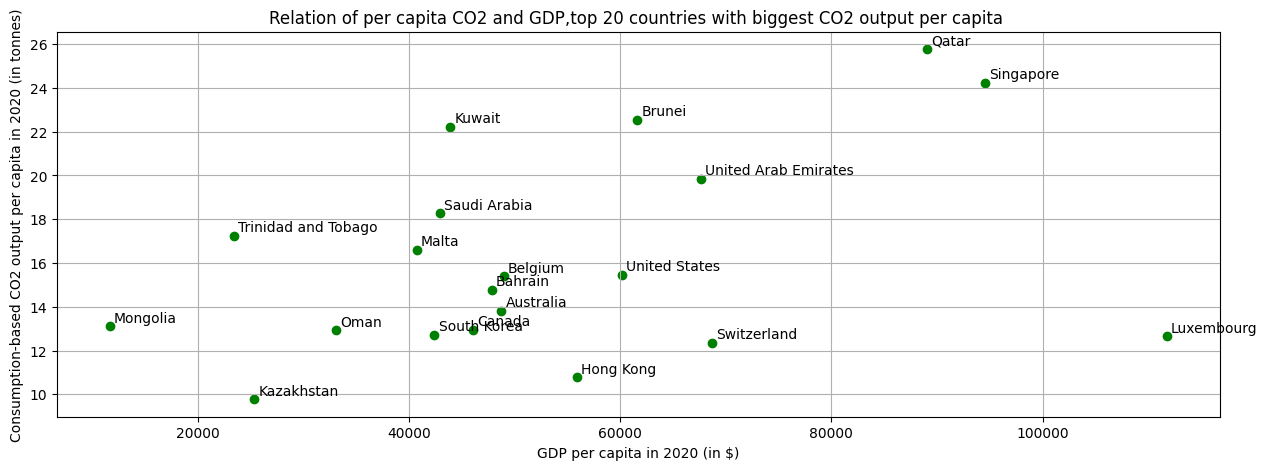

In [49]:
# Scatterplot of top 20 countries

x5=GDP_20['GDP']
y5=GDP_20['Cons_CO₂']
z5=GDP_20.index
plt.figure(figsize=(15,5))

plt.scatter(x5,y5 , c = "green")
for i, txt in enumerate(z5):
    plt.annotate(txt, (x5[i], y5[i]),xytext=(0.3, 0.3), textcoords='offset fontsize')

plt.xlabel("GDP per capita in 2020 (in $)")
plt.ylabel("Consumption-based CO2 output per capita in 2020 (in tonnes)")
plt.title("Relation of per capita CO2 and GDP,top 20 countries with biggest CO2 output per capita ")
plt.grid()


plt.show()

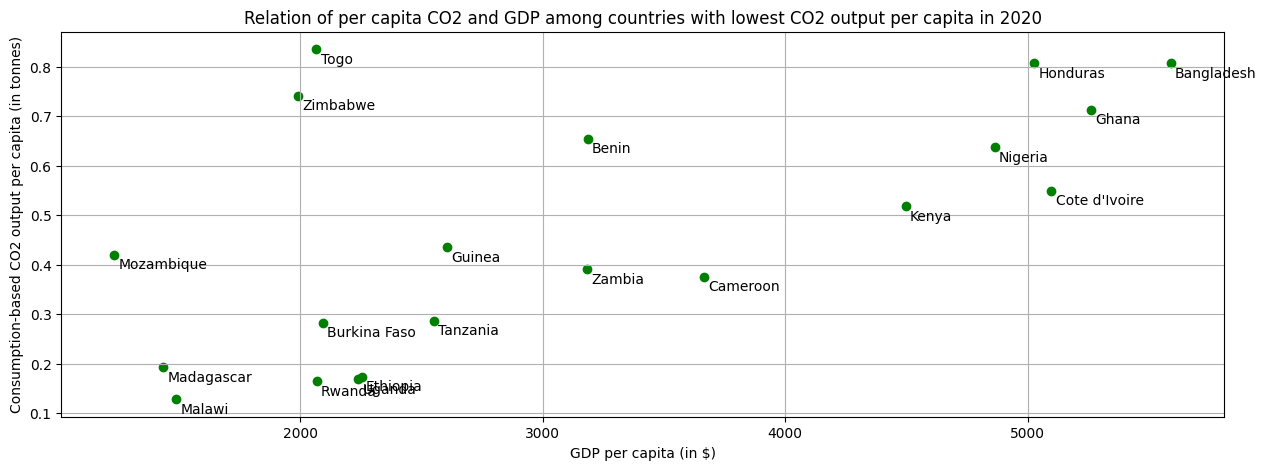

In [50]:
# Scatterplot of bottom 20 countries

x5b=GDP_20_bottom['GDP']
y5b=GDP_20_bottom['Cons_CO₂']
z5b=GDP_20_bottom.index
plt.figure(figsize=(15,5))

plt.scatter(x5b,y5b , c = "green")
for i, txt in enumerate(z5b):
    plt.annotate(txt, (x5b[i], y5b[i]), xytext=(0.3, -1), textcoords='offset fontsize')

plt.xlabel("GDP per capita (in $)")
plt.ylabel("Consumption-based CO2 output per capita (in tonnes)")
plt.title("Relation of per capita CO2 and GDP among countries with lowest CO2 output per capita in 2020")
plt.grid()

plt.show()

* **Calculating corelation with Pandas function and looking at top and bottom 3 countries with highest and lowest correlation coefficient**


---



In [53]:
# Checking correlation with pandas function

pd.options.display.float_format = '{:.2f}'.format
#df5.set_index("Entity",inplace=True)
GDP_corelation = df5.groupby(["Entity"])
GDP_c = GDP_corelation.corr(numeric_only = True)
GDP_c2=GDP_c.loc[(GDP_c["Prod_CO₂"] !=1) & (GDP_c["Cons_CO₂"] != 1)].copy()
GDP_c2.drop(columns=["GDP"], inplace=True)
GDP_c2.sort_values(by="Cons_CO₂" , ascending=False, inplace=True)
GDP_c2.drop(columns=["Year"], inplace=True)
display(GDP_c2.head(20)) # India,Vietnam,Cambodia
display(GDP_c2.tail(25)) # Germany, Sweden, Bahrain

,,Prod_CO₂,Cons_CO₂
Entity,,,
India,GDP,0.99,0.99
Vietnam,GDP,0.99,0.99
Cambodia,GDP,0.92,0.98
China,GDP,0.96,0.98
Paraguay,GDP,0.89,0.98
Cambodia,Year,0.86,0.97
Uganda,GDP,0.98,0.97
Sri Lanka,Year,0.97,0.97
China,Year,0.97,0.97


,,Prod_CO₂,Cons_CO₂
Entity,,,
United Arab Emirates,Year,-0.74,-0.66
United States,Year,-0.87,-0.66
Canada,GDP,-0.65,-0.66
Denmark,GDP,-0.79,-0.68
Bahrain,Year,-0.02,-0.70
Italy,Year,-0.72,-0.70
Slovakia,Year,-0.95,-0.70
Israel,Year,-0.79,-0.71
Czechia,GDP,-0.84,-0.72


In [ ]:
df5

* **Looking at change of GPD and CO2 per capita over the years on examples of few countries. Plotting results**

In [54]:
def plot_changes (df,country):
        df = df.loc[df.index == country].copy()
        df.set_index("Year", inplace=True)
        df["devGDP"] = (df["GDP"]/(df.loc[1990,"GDP"]))*100
        df["devProd_CO₂"] = (df["Prod_CO₂"]/(df.loc[1990,"Prod_CO₂"]))*100
        df["devCons_CO₂"] = (df["Cons_CO₂"]/(df.loc[1990,"Cons_CO₂"]))*100
        df.fillna(0)
        years = df.index
        GDP = df["devGDP"]
        CCO2 = df["devProd_CO₂"]
        PCO2 = df["devCons_CO₂"]

        plt.plot(years,GDP, label="GDP per capita")
        plt.plot(years,CCO2, label="Consumption-based CO2 per capita")
        plt.plot(years,PCO2, label="Production-based CO2 per capita")
        plt.legend()
        plt.xlabel("Years")
        plt.ylabel("Difference in %")
        plt.title(f"Change in per capita GDP and CO2 emissions in {country} during years 1990-2020")
        plt.grid()
        plt.show()

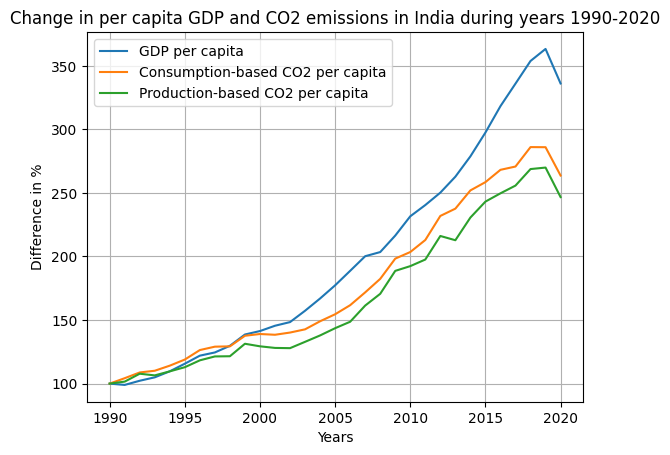

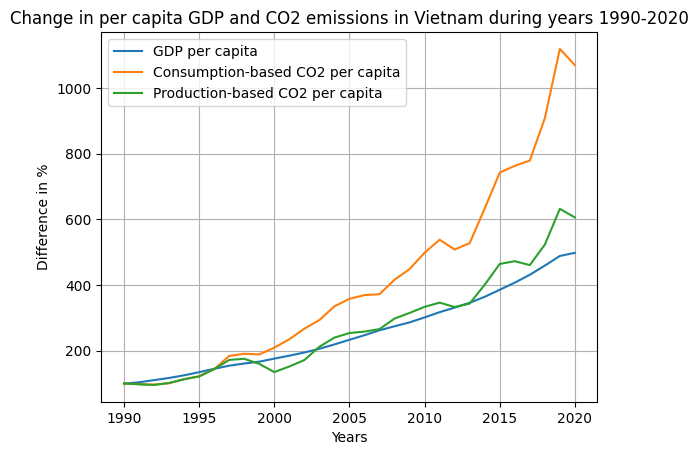

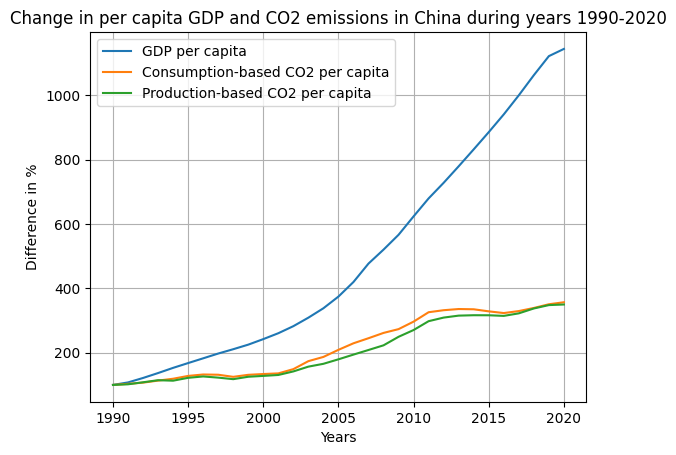

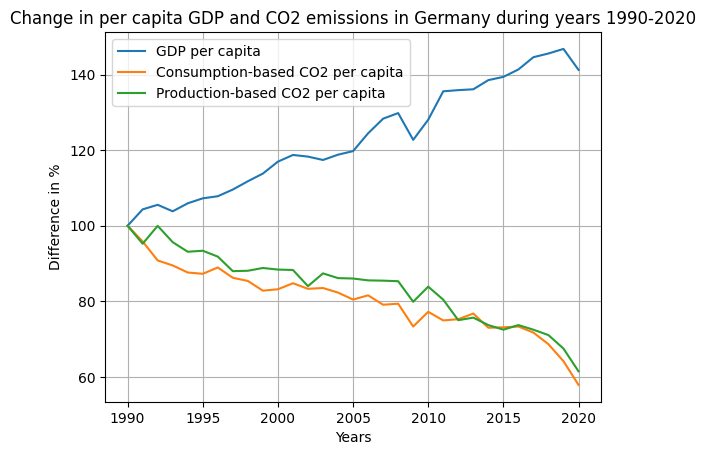

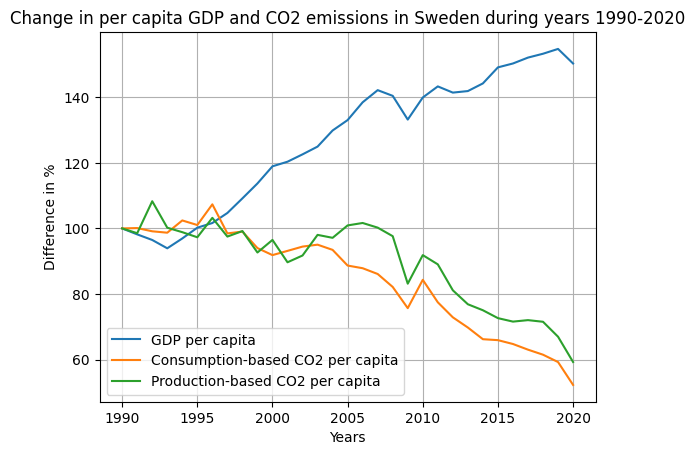

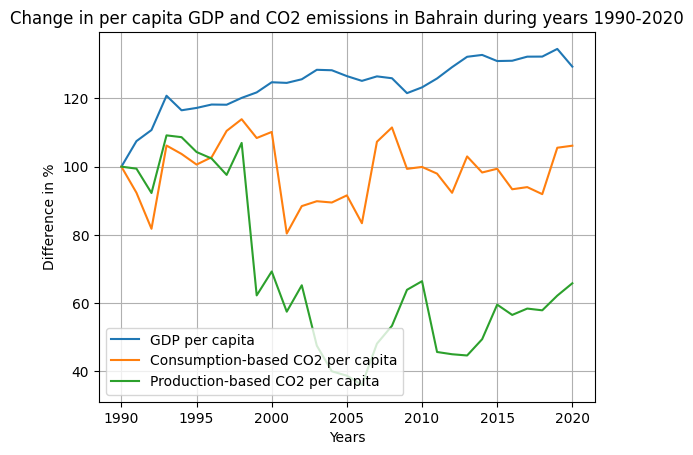

In [56]:
plot_changes(df5,"India")
plot_changes(df5,"Vietnam")
plot_changes(df5,"China")
plot_changes(df5,"Germany")
plot_changes(df5,"Sweden")
plot_changes(df5,"Bahrain")

* **Looking at GPD per capita change**

---



In [57]:
df5_GDP = df5.loc[:,["Year","GDP"]]
GDP = pd.pivot_table(df5_GDP, values=["GDP"], index=["Entity"], columns=["Year"])
GDP["absolute_dev"] = GDP[('GDP', 2020)]-GDP[('GDP', 1990)]
GDP["relative_dev"] = (GDP[('GDP', 2020)]/GDP[('GDP', 1990)]-1)*100
#GDP.columns
#display(GDP)
GDP.dropna(inplace=True) # dropping rows with empty values, there are too many missing values for some of the countries

In [58]:
GDP_capita = GDP.sort_values(by=('GDP', 2020), ascending=False) # countries sorted per GDP per capita in 2020
GDP_absolutechange = GDP.sort_values(by=('absolute_dev'), ascending=False) # countries sorted per GDP absolute change
GDP_relchange = GDP.sort_values(by=('relative_dev'), ascending=False) # countries sorted per GDP relative change

In [59]:
print('*** Highest and lowest GDP per capita per country in 2020 ***')
print("\n Top 10")
display(GDP_capita.head(10))
print("Bottom 10")
display(GDP_capita.tail(10))
print('\n')
print("*** Highest and lowest GDP per capita absolute change in years 1990-2020 ***")
print("\n Top 10")
display(GDP_absolutechange.head(10))
print("Bottom 10")
display(GDP_absolutechange.tail(10))
print('\n')
print("*** Highest and lowest GDP per capita relative change (in %). Years 1990-2020 ***")
print("\n Top 10")
display(GDP_relchange.head(10))
print("Bottom 10")
display(GDP_relchange.tail(10))

*** Highest and lowest GDP per capita per country in 2020 ***

 Top 10


GDP                                                \
Year                      1990      1991     1992     1993     1994     1995   
Entity                                                                         
Luxembourg            70860.82  75961.67 76323.30 78468.92 80365.23 80379.12   
Singapore             37289.75  38667.75 40014.82 43486.23 46819.52 48677.59   
Ireland               26706.26  27065.53 27780.23 28386.00 29901.75 32614.97   
Switzerland           56982.46  55759.34 55123.84 54555.28 54809.34 54706.10   
United Arab Emirates 105893.62 101048.70 99106.79 95524.45 97475.98 99510.35   
Brunei                70358.73  70439.05 71781.10 70154.42 70570.96 71966.09   
United States         40456.24  39876.02 40712.06 41284.36 42424.17 43047.26   
Hong Kong             28797.69  30188.37 31802.44 33199.34 34419.35 34545.53   
Denmark               39027.98  39469.32 40108.89 39979.76 41969.69 43015.68   
Netherlands           36461.42  37057.58 37405.93 37613.25 38494.22 39498.14   

                                                           ...            \
Year                     1996      1997     1998     1999  ...      2013   
Entity                                                     ...             
Luxembourg           80401.03  83702.81 88185.80 94115.38  ... 113050.66   
Singapore            50230.88  52611.79 49740.25 52166.02  ...  85400.73   
Ireland              34745.81  38190.50 41107.30 44926.53  ...  53800.21   
Switzerland          54721.71  55824.51 57345.33 58021.44  ...  67080.37   
United Arab Emirates 99602.62 100956.70 95185.30 92368.81  ...  62354.82   
Brunei               72320.98  69660.19 67770.17 68366.66  ...  65534.68   
United States        44154.55  45566.26 47056.51 48749.60  ...  56438.94   
Hong Kong            34452.99  35909.79 33516.36 34029.94  ...  55229.61   
Denmark              44013.39  45260.14 46096.37 47298.54  ...  51479.27   
Netherlands          40691.89  42235.49 43933.57 45839.13  ...  51640.08   

                                                                        \
Year                      2014      2015      2016      2017      2018   
Entity                                                                   
Luxembourg           113313.58 113182.73 116283.70 114985.84 114164.47   
Singapore             87616.64  89160.73  91146.09  95310.34  98336.95   
Ireland               58027.84  71490.80  72106.80  77749.20  83340.39   
Switzerland           67824.09  68159.22  68813.64  69103.57  70558.56   
United Arab Emirates  64334.09  68076.63  71244.59  71182.37  71550.55   
Brunei                63131.19  62170.09  59980.99  60173.05  59650.23   
United States         57308.32  58427.55  58972.90  59914.78  61355.65   
Hong Kong             56358.04  57214.69  58098.39  59842.21  61055.34   
Denmark               52048.34  52892.64  54185.01  55356.68  56178.77   
Netherlands           52187.00  52974.12  53847.83  55088.63  56060.91   

                                         absolute_dev relative_dev  
Year                      2019      2020                            
Entity                                                              
Luxembourg           114542.50 111751.31     40890.49        57.71  
Singapore             98283.31  94505.63     57215.88       153.44  
Ireland               86681.27  91099.75     64393.49       241.12  
Switzerland           70857.09  68670.24     11687.78        20.51  
United Arab Emirates  71782.16  67668.29    -38225.34       -36.10  
Brunei                61424.36  61603.55     -8755.18       -12.44  
United States         62478.25  60167.86     19711.61        48.72  
Hong Kong             59588.52  55888.69     27091.00        94.07  
Denmark               56813.96  55518.60     16490.62        42.25  
Netherlands           56784.04  54275.00     17813.59        48.86  

[10 rows x 33 columns]

Bottom 10


GDP                                                          \
Year            1990    1991    1992    1993    1994    1995    1996    1997   
Entity                                                                         
Tanzania     1338.98 1332.00 1306.36 1280.95 1251.47 1255.44 1288.10 1306.54   
Ethiopia      767.17  683.03  598.92  655.21  653.89  671.54  731.18  730.88   
Uganda        901.66  921.09  920.65  963.44  991.41 1075.94 1142.14 1165.96   
Burkina Faso  981.84 1044.17 1021.14 1030.56 1018.12 1049.08 1135.26 1176.38   
Rwanda        932.66  889.08  920.21  819.11  478.47  765.98  731.33  729.32   
Togo         1740.31 1678.64 1566.28 1338.91 1534.17 1582.26 1657.65 1835.42   
Zimbabwe     2704.76 2781.79 2468.28 2458.78 2670.11 2641.38 2867.03 2896.15   
Malawi        939.18  990.85  892.43  965.38  877.25 1025.93 1079.88 1099.28   
Madagascar   1808.74 1644.51 1614.09 1597.77 1547.65 1524.49 1508.57 1515.45   
Mozambique    460.12  473.61  436.38  469.40  476.37  465.83  502.40  544.21   

                              ...                                          \
Year            1998    1999  ...    2013    2014    2015    2016    2017   
Entity                        ...                                           
Tanzania     1320.16 1348.38  ... 2171.44 2246.56 2306.64 2380.93 2458.34   
Ethiopia      684.33  698.19  ... 1518.14 1629.19 1750.67 1864.49 1987.97   
Uganda       1187.30 1242.05  ... 2026.62 2067.80 2108.86 2137.21 2128.40   
Burkina Faso 1228.12 1280.92  ... 1823.60 1846.65 1862.85 1916.76 1978.15   
Rwanda        769.06  793.01  ... 1674.06 1735.55 1844.72 1907.68 1934.97   
Togo         1741.73 1733.75  ... 1767.00 1824.84 1881.91 1937.74 1972.70   
Zimbabwe     2931.72 2866.03  ... 2333.64 2316.95 2313.88 2286.62 2331.78   
Malawi       1118.72 1127.38  ... 1401.66 1440.81 1440.84 1437.04 1454.78   
Madagascar   1526.07 1549.03  ... 1491.07 1500.91 1508.37 1528.56 1548.16   
Mozambique    584.07  636.79  ... 1179.67 1228.66 1271.96 1279.92 1287.23   

                                     absolute_dev relative_dev  
Year            2018    2019    2020                            
Entity                                                          
Tanzania     2510.97 2577.67 2551.21      1212.23        90.53  
Ethiopia     2067.46 2181.66 2253.24      1486.07       193.71  
Uganda       2186.91 2250.01 2240.49      1338.83       148.48  
Burkina Faso 2051.22 2110.06 2093.73      1111.89       113.24  
Rwanda       2050.44 2191.40 2067.64      1134.98       121.69  
Togo         2020.97 2080.52 2066.97       326.66        18.77  
Zimbabwe     2399.62 2203.40 1990.32      -714.44       -26.41  
Malawi       1478.42 1517.70 1489.60       550.43        58.61  
Madagascar   1557.32 1585.47 1436.21      -372.54       -20.60  
Mozambique   1292.90 1285.18 1232.99       772.86       167.97  

[10 rows x 33 columns]



*** Highest and lowest GDP per capita absolute change in years 1990-2020 ***

 Top 10


GDP                                                        \
Year              1990     1991     1992     1993     1994     1995     1996   
Entity                                                                         
Ireland       26706.26 27065.53 27780.23 28386.00 29901.75 32614.97 34745.81   
Singapore     37289.75 38667.75 40014.82 43486.23 46819.52 48677.59 50230.88   
Luxembourg    70860.82 75961.67 76323.30 78468.92 80365.23 80379.12 80401.03   
South Korea   12656.40 13882.42 14590.53 15436.39 16698.28 18120.49 19364.94   
Hong Kong     28797.69 30188.37 31802.44 33199.34 34419.35 34545.53 34452.99   
Malta         16130.71 16684.16 17287.53 17882.65 18717.34 19766.20 20378.61   
Poland        11259.44 10432.45 10662.08 11032.55 11592.00 12398.52 13146.76   
United States 40456.24 39876.02 40712.06 41284.36 42424.17 43047.26 44154.55   
Netherlands   36461.42 37057.58 37405.93 37613.25 38494.22 39498.14 40691.89   
Australia     31006.10 30496.13 30285.85 31232.59 32164.66 33044.84 33905.26   

                                          ...                                \
Year              1997     1998     1999  ...      2013      2014      2015   
Entity                                    ...                                 
Ireland       38190.50 41107.30 44926.53  ...  53800.21  58027.84  71490.80   
Singapore     52611.79 49740.25 52166.02  ...  85400.73  87616.64  89160.73   
Luxembourg    83702.81 88185.80 94115.38  ... 113050.66 113313.58 113182.73   
South Korea   20367.97 19184.22 21232.61  ...  37021.13  37967.48  38828.74   
Hong Kong     35909.79 33516.36 34029.94  ...  55229.61  56358.04  57214.69   
Malta         21288.19 22234.35 23146.18  ...  35339.69  37285.24  39903.94   
Poland        13985.43 14629.20 15311.44  ...  25490.33  26488.20  27667.69   
United States 45566.26 47056.51 48749.60  ...  56438.94  57308.32  58427.55   
Netherlands   42235.49 43933.57 45839.13  ...  51640.08  52187.00  52974.12   
Australia     34852.75 36099.02 37475.98  ...  46744.62  47240.27  47567.68   

                                                                absolute_dev  \
Year               2016      2017      2018      2019      2020                
Entity                                                                         
Ireland        72106.80  77749.20  83340.39  86681.27  91099.75     64393.49   
Singapore      91146.09  95310.34  98336.95  98283.31  94505.63     57215.88   
Luxembourg    116283.70 114985.84 114164.47 114542.50 111751.31     40890.49   
South Korea    39814.66  40957.42  41965.89  42758.59  42396.76     29740.36   
Hong Kong      58098.39  59842.21  61055.34  59588.52  55888.69     27091.00   
Malta          40319.73  43516.55  44615.61  45433.92  40740.97     24610.26   
Poland         28497.10  29958.12  31739.26  33159.75  32546.83     21287.39   
United States  58972.90  59914.78  61355.65  62478.25  60167.86     19711.61   
Netherlands    53847.83  55088.63  56060.91  56784.04  54275.00     17813.59   
Australia      48109.20  48400.25  49052.82  49379.09  48747.85     17741.75   

              relative_dev  
Year                        
Entity                      
Ireland             241.12  
Singapore           153.44  
Luxembourg           57.71  
South Korea         234.98  
Hong Kong            94.07  
Malta               152.57  
Poland              189.06  
United States        48.72  
Netherlands          48.86  
Australia            57.22  

[10 rows x 33 columns]

Bottom 10


GDP                                                \
Year                      1990      1991     1992     1993     1994     1995   
Entity                                                                         
Jamaica                8692.50   9038.11  9128.91  9889.12  9924.55 10055.80   
Togo                   1740.31   1678.64  1566.28  1338.91  1534.17  1582.26   
Cameroon               3483.19   3251.76  3059.79  2736.28  2709.08  2710.94   
Tajikistan             3990.90   3615.17  2521.43  2085.21  1616.69  1389.11   
Madagascar             1808.74   1644.51  1614.09  1597.77  1547.65  1524.49   
Kyrgyzstan             5158.32   4671.52  3978.91  3362.83  2688.35  2517.28   
Zimbabwe               2704.76   2781.79  2468.28  2458.78  2670.11  2641.38   
Ukraine               16428.48  14967.73 13447.16 11531.30  8934.77  7906.96   
Brunei                70358.73  70439.05 71781.10 70154.42 70570.96 71966.09   
United Arab Emirates 105893.62 101048.70 99106.79 95524.45 97475.98 99510.35   

                                                           ...           \
Year                     1996      1997     1998     1999  ...     2013   
Entity                                                     ...            
Jamaica               9951.08   9752.66  9445.08  9471.60  ...  9718.62   
Togo                  1657.65   1835.42  1741.73  1733.75  ...  1767.00   
Cameroon              2749.52   2798.58  2854.37  2905.13  ...  3442.20   
Tajikistan            1134.23   1137.93  1190.66  1228.17  ...  2741.22   
Madagascar            1508.57   1515.45  1526.07  1549.03  ...  1491.07   
Kyrgyzstan            2656.02   2877.10  2893.42  2954.95  ...  4631.40   
Zimbabwe              2867.03   2896.15  2931.72  2866.03  ...  2333.64   
Ukraine               7179.68   7028.05  6956.40  7008.24  ... 13020.60   
Brunei               72320.98  69660.19 67770.17 68366.66  ... 65534.68   
United Arab Emirates 99602.62 100956.70 95185.30 92368.81  ... 62354.82   

                                                                            \
Year                     2014     2015     2016     2017     2018     2019   
Entity                                                                       
Jamaica               9745.55  9800.51  9906.04  9984.58 10160.76 10244.37   
Togo                  1824.84  1881.91  1937.74  1972.70  2020.97  2080.52   
Cameroon              3530.28  3614.76  3667.32  3691.09  3732.50  3756.51   
Tajikistan            2858.24  2959.99  3091.23  3236.44  3405.09  3575.28   
Madagascar            1500.91  1508.37  1528.56  1548.16  1557.32  1585.47   
Kyrgyzstan            4722.09  4805.14  4912.38  5046.69  5133.15  5258.37   
Zimbabwe              2316.95  2313.88  2286.62  2331.78  2399.62  2203.40   
Ukraine              12385.81 11216.12 11536.32 11860.56 12336.93 12804.95   
Brunei               63131.19 62170.09 59980.99 60173.05 59650.23 61424.36   
United Arab Emirates 64334.09 68076.63 71244.59 71182.37 71550.55 71782.16   

                              absolute_dev relative_dev  
Year                     2020                            
Entity                                                   
Jamaica               9198.15       505.65         5.82  
Togo                  2066.97       326.66        18.77  
Cameroon              3665.51       182.32         5.23  
Tajikistan            3651.94      -338.96        -8.49  
Madagascar            1436.21      -372.54       -20.60  
Kyrgyzstan            4726.20      -432.12        -8.38  
Zimbabwe              1990.32      -714.44       -26.41  
Ukraine              12407.79     -4020.69       -24.47  
Brunei               61603.55     -8755.18       -12.44  
United Arab Emirates 67668.29    -38225.34       -36.10  

[10 rows x 33 columns]



*** Highest and lowest GDP per capita relative change (in %). Years 1990-2020 ***

 Top 10


GDP                                                        \
Year            1990     1991     1992     1993     1994     1995     1996   
Entity                                                                       
China        1423.90  1534.71  1731.66  1949.53  2178.92  2391.48  2601.36   
Vietnam      2099.39  2177.47  2317.27  2455.51  2623.72  2825.02  3039.94   
Laos         1939.09  1966.44  2019.39  2082.10  2194.53  2291.87  2394.07   
Ireland     26706.26 27065.53 27780.23 28386.00 29901.75 32614.97 34745.81   
India        1819.02  1800.01  1859.71  1908.58  1994.94  2103.73  2218.82   
South Korea 12656.40 13882.42 14590.53 15436.39 16698.28 18120.49 19364.94   
Sri Lanka    4011.66  4145.95  4279.30  4526.59  4735.26  4955.05  5108.52   
Bangladesh   1730.37  1756.33  1818.15  1867.78  1903.58  1964.06  2017.21   
Ethiopia      767.17   683.03   598.92   655.21   653.89   671.54   731.18   
Poland      11259.44 10432.45 10662.08 11032.55 11592.00 12398.52 13146.76   

                                        ...                             \
Year            1997     1998     1999  ...     2013     2014     2015   
Entity                                  ...                              
China        2812.71  3004.43  3206.73  ... 11101.94 11851.40 12612.35   
Vietnam      3239.68  3378.90  3495.10  ...  7257.73  7641.91  8091.09   
Laos         2505.62  2557.18  2696.16  ...  5789.28  6145.50  6499.07   
Ireland     38190.50 41107.30 44926.53  ... 53800.21 58027.84 71490.80   
India        2264.80  2359.89  2521.58  ...  4780.12  5071.05  5411.88   
South Korea 20367.97 19184.22 21232.61  ... 37021.13 37967.48 38828.74   
Sri Lanka    5405.25  5630.65  5841.74  ... 11414.17 12029.38 12420.55   
Bangladesh   2070.44  2137.15  2194.53  ...  3932.71  4119.43  4337.39   
Ethiopia      730.88   684.33   698.19  ...  1518.14  1629.19  1750.67   
Poland      13985.43 14629.20 15311.44  ... 25490.33 26488.20 27667.69   

                                                         absolute_dev  \
Year            2016     2017     2018     2019     2020                
Entity                                                                  
China       13399.14 14243.53 15134.00 15977.76 16296.78     14872.88   
Vietnam      8545.70  9050.69  9636.01 10252.00 10450.62      8351.23   
Laos         6850.58  7211.26  7546.33  7840.07  7763.95      5824.86   
Ireland     72106.80 77749.20 83340.39 86681.27 91099.75     64393.49   
India        5789.68  6112.07  6436.15  6608.62  6114.03      4295.01   
South Korea 39814.66 40957.42 41965.89 42758.59 42396.76     29740.36   
Sri Lanka   12904.85 13584.19 13753.06 13639.02 13095.76      9084.10   
Bangladesh   4589.09  4830.78  5124.50  5467.21  5591.37      3861.01   
Ethiopia     1864.49  1987.97  2067.46  2181.66  2253.24      1486.07   
Poland      28497.10 29958.12 31739.26 33159.75 32546.83     21287.39   

            relative_dev  
Year                      
Entity                    
China            1044.52  
Vietnam           397.79  
Laos              300.39  
Ireland           241.12  
India             236.12  
South Korea       234.98  
Sri Lanka         226.44  
Bangladesh        223.13  
Ethiopia          193.71  
Poland            189.06  

[10 rows x 33 columns]

Bottom 10


GDP                                                \
Year                      1990      1991     1992     1993     1994     1995   
Entity                                                                         
Jamaica                8692.50   9038.11  9128.91  9889.12  9924.55 10055.80   
Cameroon               3483.19   3251.76  3059.79  2736.28  2709.08  2710.94   
Saudi Arabia          41984.83  46402.72 46502.13 44415.55 43396.64 42288.41   
Kyrgyzstan             5158.32   4671.52  3978.91  3362.83  2688.35  2517.28   
Tajikistan             3990.90   3615.17  2521.43  2085.21  1616.69  1389.11   
Brunei                70358.73  70439.05 71781.10 70154.42 70570.96 71966.09   
Madagascar             1808.74   1644.51  1614.09  1597.77  1547.65  1524.49   
Ukraine               16428.48  14967.73 13447.16 11531.30  8934.77  7906.96   
Zimbabwe               2704.76   2781.79  2468.28  2458.78  2670.11  2641.38   
United Arab Emirates 105893.62 101048.70 99106.79 95524.45 97475.98 99510.35   

                                                           ...           \
Year                     1996      1997     1998     1999  ...     2013   
Entity                                                     ...            
Jamaica               9951.08   9752.66  9445.08  9471.60  ...  9718.62   
Cameroon              2749.52   2798.58  2854.37  2905.13  ...  3442.20   
Saudi Arabia         42237.77  41572.90 41659.58 39066.93  ... 45674.32   
Kyrgyzstan            2656.02   2877.10  2893.42  2954.95  ...  4631.40   
Tajikistan            1134.23   1137.93  1190.66  1228.17  ...  2741.22   
Brunei               72320.98  69660.19 67770.17 68366.66  ... 65534.68   
Madagascar            1508.57   1515.45  1526.07  1549.03  ...  1491.07   
Ukraine               7179.68   7028.05  6956.40  7008.24  ... 13020.60   
Zimbabwe              2867.03   2896.15  2931.72  2866.03  ...  2333.64   
United Arab Emirates 99602.62 100956.70 95185.30 92368.81  ... 62354.82   

                                                                            \
Year                     2014     2015     2016     2017     2018     2019   
Entity                                                                       
Jamaica               9745.55  9800.51  9906.04  9984.58 10160.76 10244.37   
Cameroon              3530.28  3614.76  3667.32  3691.09  3732.50  3756.51   
Saudi Arabia         46394.90 47379.36 47210.23 45795.51 45840.84 44954.99   
Kyrgyzstan            4722.09  4805.14  4912.38  5046.69  5133.15  5258.37   
Tajikistan            2858.24  2959.99  3091.23  3236.44  3405.09  3575.28   
Brunei               63131.19 62170.09 59980.99 60173.05 59650.23 61424.36   
Madagascar            1500.91  1508.37  1528.56  1548.16  1557.32  1585.47   
Ukraine              12385.81 11216.12 11536.32 11860.56 12336.93 12804.95   
Zimbabwe              2316.95  2313.88  2286.62  2331.78  2399.62  2203.40   
United Arab Emirates 64334.09 68076.63 71244.59 71182.37 71550.55 71782.16   

                              absolute_dev relative_dev  
Year                     2020                            
Entity                                                   
Jamaica               9198.15       505.65         5.82  
Cameroon              3665.51       182.32         5.23  
Saudi Arabia         42891.69       906.86         2.16  
Kyrgyzstan            4726.20      -432.12        -8.38  
Tajikistan            3651.94      -338.96        -8.49  
Brunei               61603.55     -8755.18       -12.44  
Madagascar            1436.21      -372.54       -20.60  
Ukraine              12407.79     -4020.69       -24.47  
Zimbabwe              1990.32      -714.44       -26.41  
United Arab Emirates 67668.29    -38225.34       -36.10  

[10 rows x 33 columns]

* **Looking at per capita GDP and CO2 change over the time and its relation to each other. Analyse on a sample of few countries.**

---



In [ ]:
df5
# Based on previous analysis in this notebook(above) I want to take a closer look on these countries:
  # China - biggest CO2 output in total and increasing substantially over last 2 decades
  # United States - second biggest CO2 output in total but decreasing over last decade
  # Luxembourg -lowered CO2 output per capita with almost 60% over last 3 decades and has highest GDP per capita
  # Qatar - biggest CO2 output per capita
  # Madagascar -one of the lowest per capita both: CO2 and GDP
  # Zimbabwe- outlier on per capita CO2 and GDP relation
  # United Arab Emirates

In [60]:
def plot_changes (df,country):
        df = df.loc[df.index == country].copy()
        df.set_index("Year", inplace=True)
        df["devGDP"] = (df["GDP"]/(df.loc[1990,"GDP"]))*100
        df["devProd_CO₂"] = (df["Prod_CO₂"]/(df.loc[1990,"Prod_CO₂"]))*100
        df["devCons_CO₂"] = (df["Cons_CO₂"]/(df.loc[1990,"Cons_CO₂"]))*100
        df.fillna(0)
        years = df.index
        GDP = df["devGDP"]
        CCO2 = df["devProd_CO₂"]
        PCO2 = df["devCons_CO₂"]

        plt.plot(years,GDP, label="GDP per capita")
        plt.plot(years,CCO2, label="Consumption-based CO2 per capita")
        plt.plot(years,PCO2, label="Production-based CO2 per capita")
        plt.legend()
        plt.xlabel("Years")
        plt.ylabel("Difference in %")
        plt.title(f"Change in per capita GDP and CO2 emissions in {country} during years 1990-2020")
        plt.grid()
        plt.show()

# as Qatar is missing some data before 2000 I adjust the year:
def plot_changes_2000 (df,country):
        df = df.loc[df.index == country].copy()
        df.set_index("Year", inplace=True)
        df["devGDP"] = (df["GDP"]/(df.loc[2000,"GDP"]))*100
        df["devProd_CO₂"] = (df["Prod_CO₂"]/(df.loc[2000,"Prod_CO₂"]))*100
        df["devCons_CO₂"] = (df["Cons_CO₂"]/(df.loc[2000,"Cons_CO₂"]))*100
        df.fillna(0)
        years = df.index
        GDP = df["devGDP"]
        CCO2 = df["devProd_CO₂"]
        PCO2 = df["devCons_CO₂"]

        plt.plot(years,GDP, label="GDP per capita")
        plt.plot(years,CCO2, label="Consumption-based CO2 per capita")
        plt.plot(years,PCO2, label="Production-based CO2 per capita")
        plt.legend()
        plt.xlabel("Years")
        plt.ylabel("Difference in %")
        plt.title(f"Change in per capita GDP and CO2 emissions in {country} during years 1990-2020")
        plt.grid()
        plt.show()

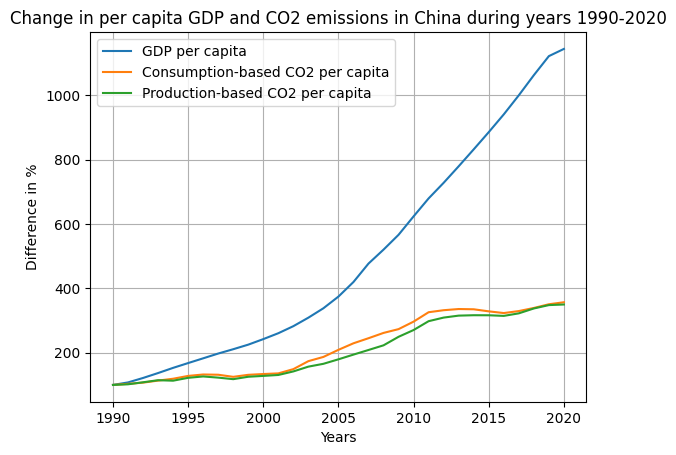

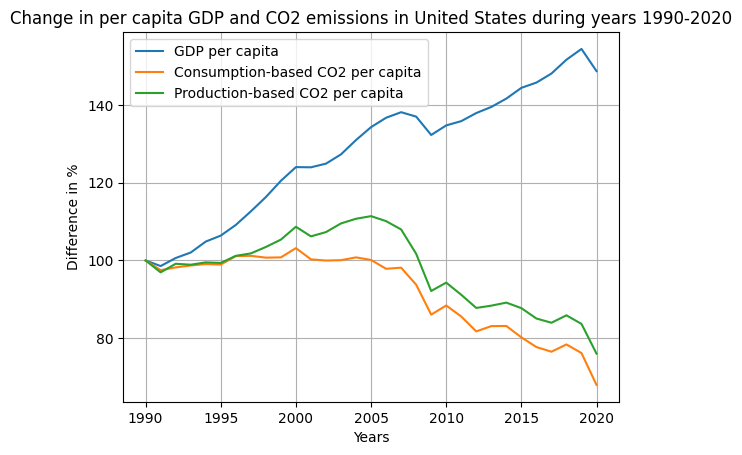

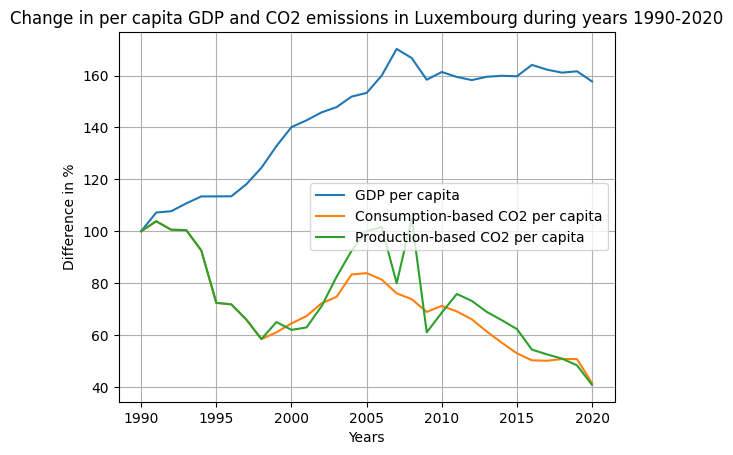

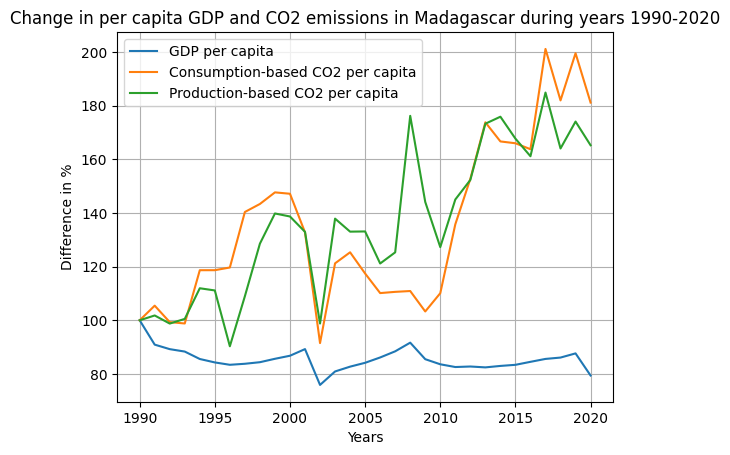

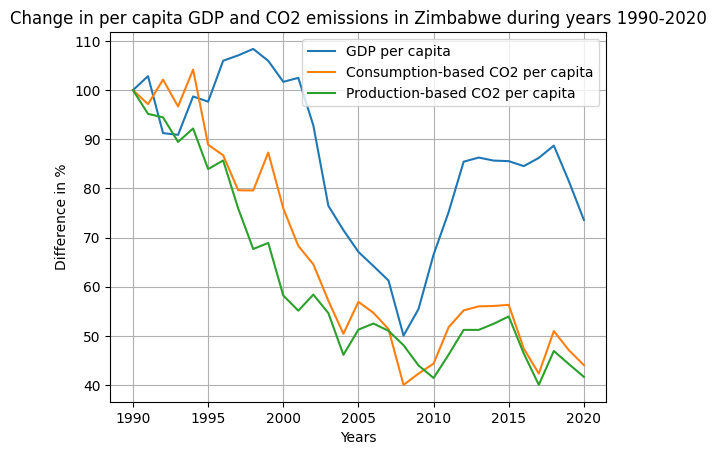

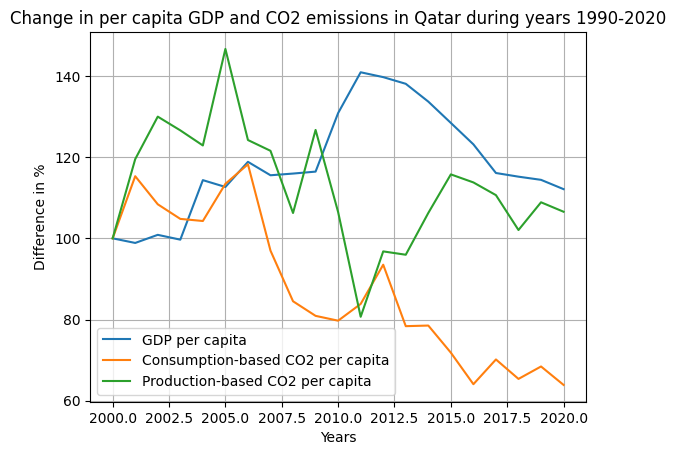

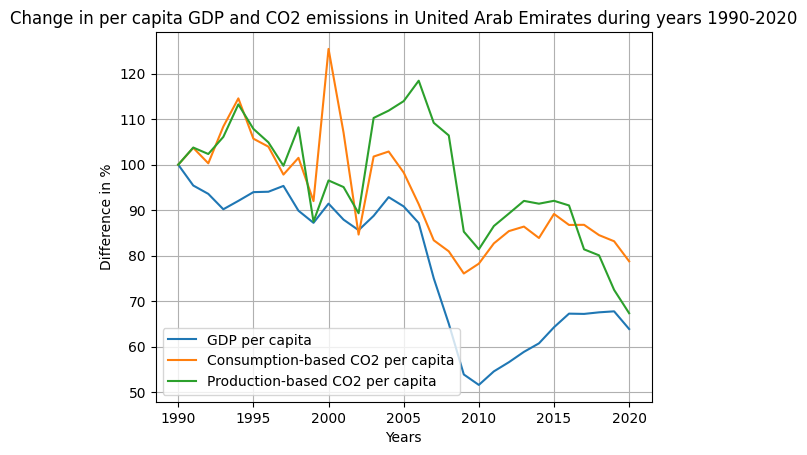

In [61]:
plot_changes(df5,"China")
plot_changes(df5,"United States")
plot_changes(df5,"Luxembourg")
plot_changes(df5,"Madagascar")
plot_changes(df5,"Zimbabwe")
plot_changes_2000(df5,"Qatar")
plot_changes(df5,"United Arab Emirates")

###  **7. Access to clean fuels for cooking vs GDP per capita and CO2 output per capita**

**Inspecting and cleaning up data base**

---



In [74]:
df6 = pd.read_csv("https://raw.githubusercontent.com/MonikaGost/Winc/master/Final_assignment/access-to-clean-fuels-for-cooking-vs-gdp-per-capita.csv")
#Looking on the data
#df6
df6.columns

Index(['Entity', 'Code', 'Year',
       'Indicator:Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence Area Type:Total',
       'GDP per capita, PPP (constant 2017 international $)',
       'Population (historical estimates)', 'Continent'],
      dtype='object')

In [75]:
#Reindexing, dropping and renaming some columns
df6.set_index("Entity", inplace=True)
df6.drop(columns=["Code","Continent"], inplace=True)
df6.rename(columns={"Indicator:Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence Area Type:Total":
                    "Clean_fuels_indicator","GDP per capita, PPP (constant 2017 international $)":"GDP","Population (historical estimates)":"Population"},inplace=True)
df6.dropna(inplace=True)

In [ ]:
# Looking at countries names
df6unique = df6.index.unique()
display(len(df6unique)) # we have 181 unique 'country' names
display(list(df6unique)) #they all seem correct, except "World" but i leave it for now as it is

In [79]:
df6a = pd.merge(df6, df1, how='left', on=['Entity', 'Year']) # I want to add CO2 output data,I choose production-based CO2 data

In [80]:
df6a.drop(columns="Population", inplace=True)
df6a.dropna(inplace=True)

In [ ]:
df6_2020=df6a.loc[df6a["Year"]==2020].copy()
df6_2020.sort_values(by="Clean_fuels_indicator", ascending=False, inplace=True)
clean_fuels_top20 = df6_2020.head(20)
clean_fuels_end20 = df6_2020.tail(20)
display(clean_fuels_top20)
#display(clean_fuels_end20)

In [85]:
df6_2020

,Year,Clean_fuels_indicator,GDP,Annual CO₂
Entity,,,,
Latvia,2020,100.00,30568.50,3.69
Sweden,2020,100.00,51331.28,3.52
Italy,2020,100.00,39065.28,5.08
Israel,2020,100.00,39351.89,6.28
Ireland,2020,100.00,91099.75,7.11
...,...,...,...,...
Central African Republic,2020,0.80,847.76,0.04
Sierra Leone,2020,0.80,1586.20,0.15
Uganda,2020,0.50,2240.49,0.12


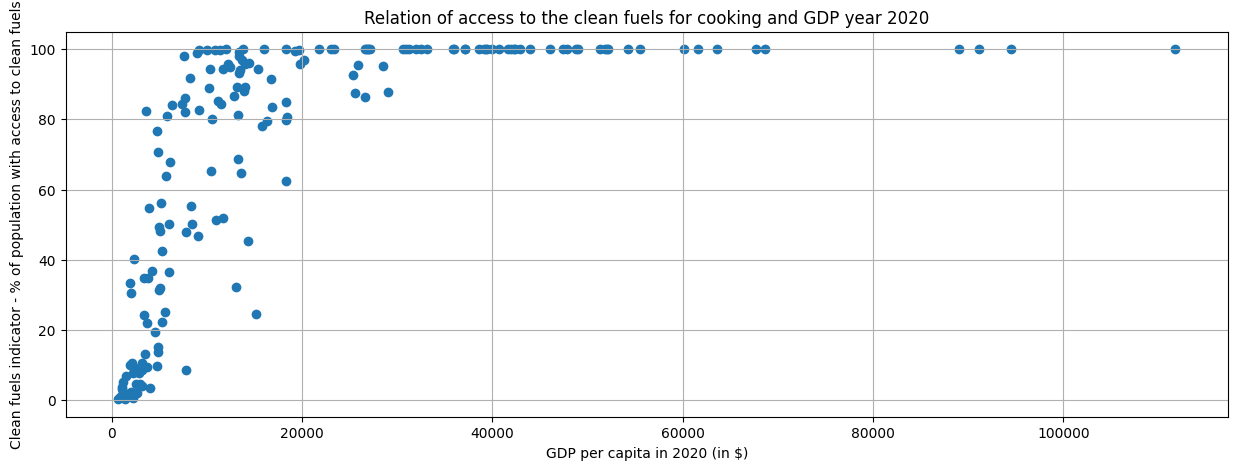

In [82]:
plt.figure(figsize=(15,5))

plt.scatter(df6_2020["GDP"],df6_2020['Clean_fuels_indicator'])
plt.xlabel("GDP per capita in 2020 (in $)")
plt.ylabel("Clean fuels indicator - % of population with access to clean fuels")
plt.title("Relation of access to the clean fuels for cooking and GDP year 2020")
plt.grid()

plt.show()

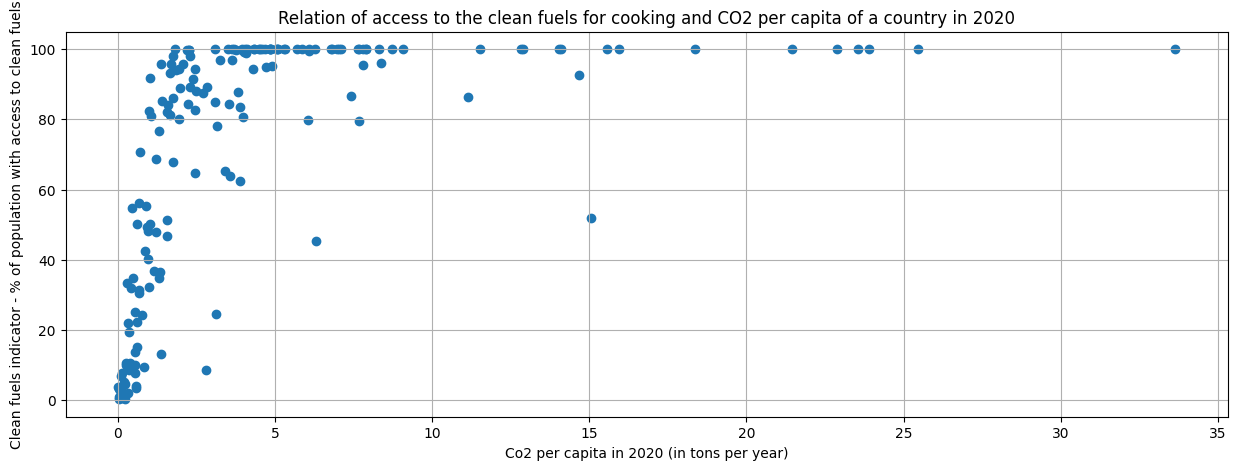

In [83]:
plt.figure(figsize=(15,5))

plt.scatter(df6_2020["Annual CO₂"],df6_2020['Clean_fuels_indicator'])
plt.xlabel("Co2 per capita in 2020 (in tons per year)")
plt.ylabel("Clean fuels indicator - % of population with access to clean fuels")
plt.title("Relation of access to the clean fuels for cooking and CO2 per capita of a country in 2020")
plt.grid()

plt.show()

### **8. Energy use per capita**

**Inspecting and cleaning up data frame**

---



In [ ]:
df8 = pd.read_csv("https://raw.githubusercontent.com/MonikaGost/Winc/master/Final_assignment/per-capita-energy-use.csv")
df8.drop(columns="Code", inplace=True)
df8.rename(columns={"Primary energy consumption per capita (kWh/person)":"Energy"},inplace=True)
df8.set_index("Entity",inplace=True)
df8

In [ ]:
df8unique = df8.index.unique()
display(len(df8unique)) # we have 234 unique 'country' names
display(list(df8unique))

In [ ]:
remove= ['Africa','Asia','Europe','European Union (27)','High-income countries','Low-income countries','Lower-middle-income countries','North America','Oceania',
         'South America','Upper-middle-income countries','World']
df8.drop(index = remove, axis=0, inplace=True)
# we have 222 unique country names left

**Merging data frames**

---



In [ ]:
df8_2 = pd.merge(df8, df5, how='left', on=['Entity', 'Year'])
df8_2.dropna(inplace=True)
Energy = df8_2.loc[df8_2["Year"]==2020].copy()
Energy2020 = Energy.sort_values(by="Energy", ascending =False, inplace=True)
energy_top = Energy.head(20) #getting top 20 energy consumers
energy_tail =Energy.tail(20) # getting bottom 20 energy consumers
energy_top.columns

**Plotting data**

---



* **Relation of per capita energy consumption and CO2 output**

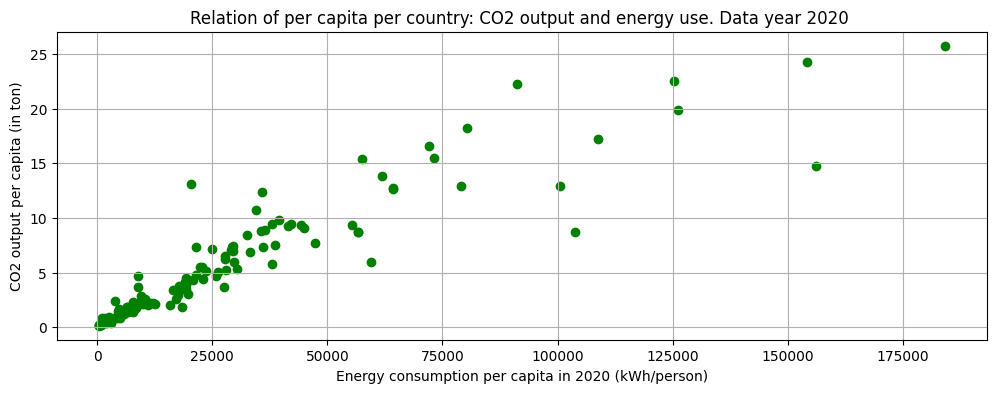

In [ ]:
x8=Energy['Energy']
y8=Energy['Cons_CO₂']

plt.figure(figsize=(12,4))

plt.scatter(x8,y8 , c = "green")

plt.xlabel("Energy consumption per capita in 2020 (kWh/person)")
plt.ylabel("CO2 output per capita (in ton)")
plt.title("Relation of per capita per country: CO2 output and energy use. Data year 2020 ")
plt.grid()
plt.show()

* **Top 20 energy consumers in relation to CO2 output per capita**

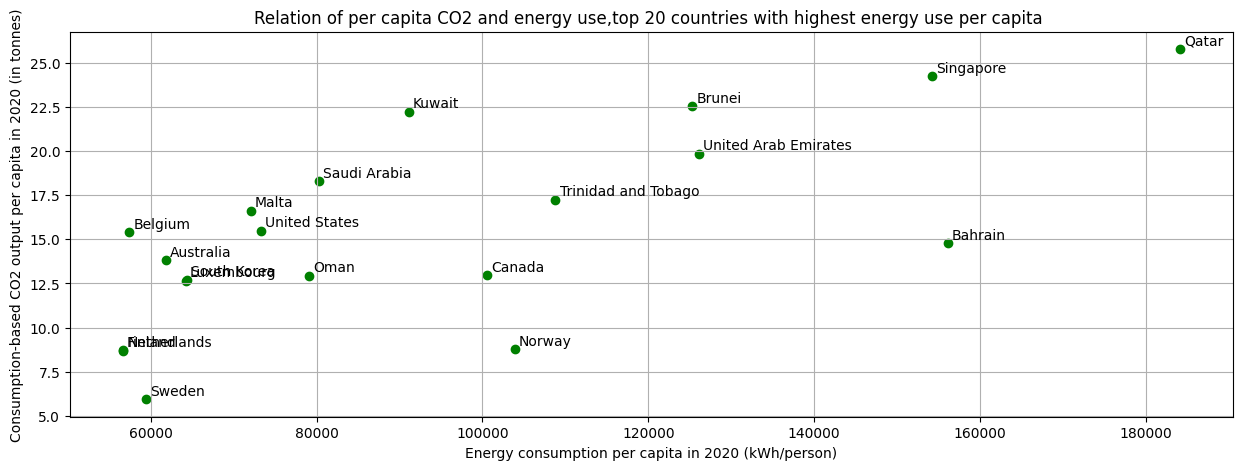

In [ ]:
x8=energy_top['Energy']
y8=energy_top['Cons_CO₂']
z8=energy_top.index
plt.figure(figsize=(15,5))

plt.scatter(x8,y8 , c = "green")
for i, txt in enumerate(z8):
    plt.annotate(txt, (x8[i], y8[i]),xytext=(0.3, 0.3), textcoords='offset fontsize')

plt.xlabel("Energy consumption per capita in 2020 (kWh/person)")
plt.ylabel("Consumption-based CO2 output per capita in 2020 (in tonnes)")
plt.title("Relation of per capita CO2 and energy use,top 20 countries with highest energy use per capita ")
plt.grid()
plt.show()

* **Bottom 20 energy consumers in relation to CO2 output per capita**

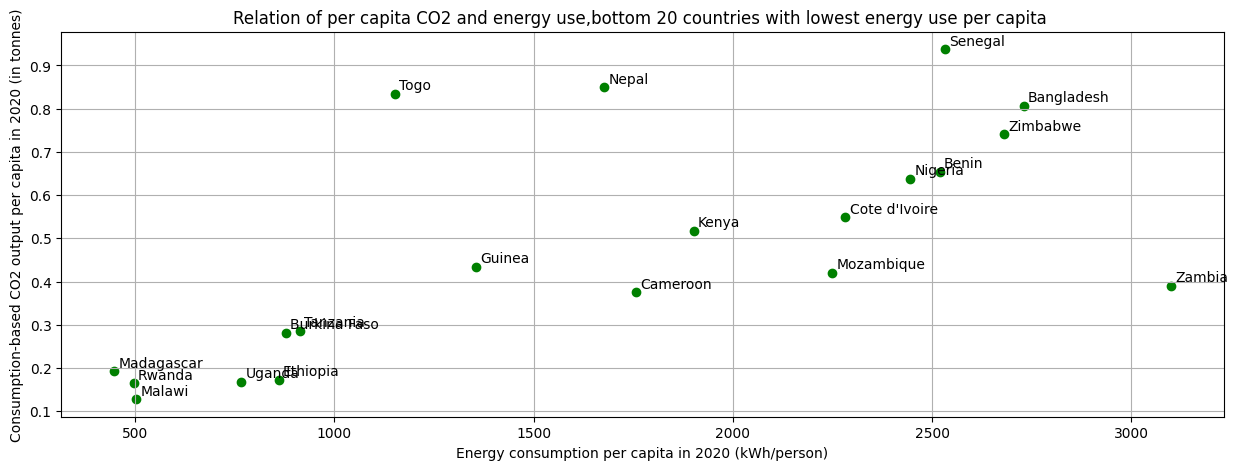

In [ ]:
x8=energy_tail['Energy']
y8=energy_tail['Cons_CO₂']
z8=energy_tail.index
plt.figure(figsize=(15,5))

plt.scatter(x8,y8 , c = "green")
for i, txt in enumerate(z8):
    plt.annotate(txt, (x8[i], y8[i]),xytext=(0.3, 0.3), textcoords='offset fontsize')

plt.xlabel("Energy consumption per capita in 2020 (kWh/person)")
plt.ylabel("Consumption-based CO2 output per capita in 2020 (in tonnes)")
plt.title("Relation of per capita CO2 and energy use,bottom 20 countries with lowest energy use per capita ")
plt.grid()
plt.show()

### **9. Fossil energy consumption per capita**

**Inspecting and cleaning data frame**

---



In [ ]:
#data source: https://ourworldindata.org/grapher/co-emissions-per-capita-vs-fossil-fuel-consumption-per-capita?tab=table&time=2018
#Fossil fuel consumption is measured as the average consumption of energy from coal, oil and gas per
#person. Emissions include fossil fuel and industry emissions. Land use change is not included.

df9 = pd.read_csv("https://raw.githubusercontent.com/MonikaGost/Winc/master/Final_assignment/co-emissions-per-capita-vs-fossil-fuel-consumption-per-capita.csv")
display(df9)
df9.columns

In [ ]:
# Renaming and dropping columns
df9.drop(columns = ["Code",'Population (historical estimates)','Income classifications (World Bank (2017))'], inplace=True)
df9.rename(columns= {"Annual CO₂ emissions (per capita)":"CO2",'Fossil fuels per capita (kWh)':'Fossil'}, inplace=True)
df9.set_index("Entity",inplace=True) # setting country names as index
df9

In [ ]:
uv9 = df9.index.unique()
display(len(uv9)) # we have 274 unique 'country' names
display(list(uv9)) # not all of these values are actual cuntries, so i remove them from the list

In [91]:
df9_drop = ['Africa','Africa (UN)','Asia','Asia (UN)','Asia (excl. China and India)','Czechoslovakia','East Germany','Ethiopia (former)',
            'Europe','Europe (UN)','Europe (excl. EU-27)','Europe (excl. EU-28)','European Union (27)','European Union (28)',
            'High-income countries','Latin America and the Caribbean (UN)','Low-income countries','Lower-middle-income countries',
            'North America','North America (excl. USA)','Northern America (UN)','Oceania','Oceania (UN)','South America','Upper-middle-income countries','West Germany','World']
df9.drop(index=df9_drop,axis=0,inplace=True)
# We have 247 countries left

In [92]:
df9.isnull().sum() # Looks there are quite some missing data. I don't want to manipulate the results so I just drop them.
df9.dropna(inplace=True)

In [ ]:
display(df9)

,Year,CO2,Fossil
Entity,,,
Algeria,1965,0.532137,1910.1324
Algeria,1966,0.667613,2281.9224
Algeria,1967,0.653757,2096.2073
Algeria,1968,0.686093,2174.2285
Algeria,1969,0.834849,2406.9130
...,...,...,...
Vietnam,2017,2.478286,7801.7310
Vietnam,2018,2.889164,9067.5840
Vietnam,2019,3.560416,10585.5810


In [ ]:
df9_2020 = df9.loc[df9["Year"]==2020].copy()
df9_2020 # 74 countries on the list

 **Looking at correlation with Panda's function**

---



In [94]:
df9_2020.drop(columns="Year", inplace=True)
df9corr=df9_2020.corr(numeric_only = True)
df9corr

,CO2,Fossil
CO2,1.00,0.85
Fossil,0.85,1.00


**Plotting relation of fossil fuels use to CO2 output**

---



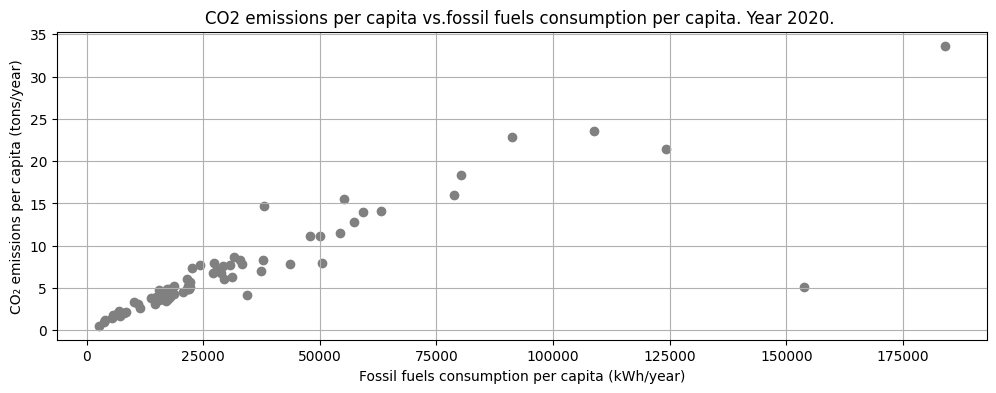

In [95]:
x9=df9_2020['Fossil']
y9=df9_2020['CO2']
plt.figure(figsize=(12,4))

plt.scatter(x9,y9 , c = "grey")

plt.xlabel("Fossil fuels consumption per capita (kWh/year)")
plt.ylabel("CO₂ emissions per capita (tons/year)")
plt.title("CO2 emissions per capita vs.fossil fuels consumption per capita. Year 2020. ")
plt.grid()


plt.show()

**Lookig at per capita change in fossil energy consumption over the years and if there is a relation in CO2 output**

---



* **First I am looking for the biggest changers in fossil energy consumption**

In [96]:
df9a=df9.drop(columns="CO2")
df9fossil=pd.pivot_table(df9a, values="Fossil", index=["Entity"], columns=["Year"]) # produces Nan values
df9fossil #  there isquite some data missing for certain years
list(df9fossil.isna().sum()) # there is more data available in the most recent years, so I scale the data frame to last 20 years
df9fossil_last20 = df9fossil.loc[:,2000:2021].copy()
df9fossil_last20 # we have 79 countries left
df9fossil_last20["dev_fossil"] = ((df9fossil_last20[2021]-df9fossil_last20[2000])/df9fossil_last20[2000])*100
df9fossil_last20.sort_values(by="dev_fossil", ascending=False, inplace=True)
df9fossil_last20.dropna(inplace=True)
display(df9fossil_last20.head(10)) # I want to look at Vietnam,China,India
display(df9fossil_last20.tail(10)) # I choose from here: France, Sweden and Denmark for furhter analysis

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,dev_fossil
Entity,,,,,,,,,,,,,,,,,,,,,
Vietnam,2166.07,2362.23,2624.41,2826.20,3601.32,3876.32,3367.11,3616.92,4486.26,4437.62,...,5555.38,6130.77,7319.87,7806.39,7801.73,9067.58,10585.58,10144.93,9576.05,342.09
China,8769.30,9110.63,9881.28,11529.11,13365.72,15107.31,16459.68,17743.49,18000.25,18734.28,...,22184.71,22257.49,22160.79,21823.23,22343.95,23094.19,23856.84,24389.40,25470.84,190.45
Bangladesh,1036.48,1159.47,1146.84,1192.21,1245.88,1330.56,1423.68,1443.22,1509.88,1652.45,...,1975.87,2027.83,2421.90,2397.06,2472.86,2611.44,2897.84,2712.83,2811.39,171.25
India,3252.10,3212.55,3268.62,3336.63,3489.01,3669.99,3776.82,4035.73,4247.29,4537.95,...,5073.98,5350.10,5477.87,5672.66,5793.15,6026.01,6042.32,5613.43,6073.89,86.77
Oman,47317.12,51864.10,55331.73,56736.63,51916.52,61629.49,66495.54,66225.36,75738.21,73844.13,...,83182.48,78766.02,80341.62,76789.69,77795.62,81653.54,81056.40,78855.78,86606.97,83.04
Kazakhstan,22806.01,25681.80,25946.77,28519.60,30317.52,30978.93,33120.57,36363.75,38105.96,33742.25,...,41242.39,42673.31,34579.18,38131.86,40714.86,41764.11,41844.43,37939.25,40726.70,78.58
Iran,21134.99,22196.27,23807.55,23961.67,26026.56,27054.09,29003.52,30459.47,31396.15,31751.76,...,33090.83,33842.55,33015.49,33855.54,34569.65,35521.78,36379.61,37772.68,37628.95,78.04
Peru,3714.95,3472.29,3517.56,3370.93,3810.38,3945.74,3798.86,4291.47,4808.72,4809.86,...,6460.85,6567.97,6790.39,7236.56,6838.96,6977.60,7041.26,5547.04,6503.05,75.05
Morocco,4032.69,4278.16,4336.52,4237.19,4774.86,5191.28,5232.95,5119.29,5586.19,5228.14,...,6007.58,6055.05,6025.95,6006.06,6233.54,6253.10,6719.75,6051.81,6690.10,65.90


Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,dev_fossil
Entity,,,,,,,,,,,,,,,,,,,,,
Uzbekistan,23356.10,23124.54,23405.55,21026.02,20772.37,20430.22,18948.02,19994.61,18641.14,18000.40,...,17629.98,17967.82,16862.34,15790.10,15981.57,15964.36,15693.90,15468.46,16164.36,-30.79
France,29313.79,29237.42,28591.10,28967.34,28983.72,28798.32,28090.19,27315.38,26923.02,25569.21,...,23700.16,21465.91,21827.76,22225.05,22405.55,21840.58,21490.22,18653.23,20212.73,-31.05
Ireland,45058.20,47042.20,45528.76,43834.76,43728.25,44345.41,44203.06,43379.25,41685.37,36479.72,...,32311.06,31514.48,32383.40,33901.58,32799.80,32523.86,31375.68,27965.00,29368.95,-34.82
Switzerland,24810.33,26275.68,24857.54,24353.93,24211.27,24546.77,24785.93,22511.07,23645.39,23467.17,...,22239.80,19587.03,19797.25,18918.79,19110.35,18215.83,18481.79,15868.57,16160.66,-34.86
Sweden,25930.09,26623.63,27161.41,28558.11,27523.49,27026.47,27466.38,26520.10,25030.90,23334.57,...,20660.27,19745.83,19318.74,19651.93,19237.90,18388.89,19252.77,16957.29,16142.10,-37.75
Finland,43306.41,45737.19,47297.50,52482.80,48446.06,42560.82,48095.78,46554.57,42099.24,39840.45,...,37185.96,34172.00,32096.90,33719.62,31900.50,32643.19,30917.52,27178.04,26449.33,-38.93
United Kingdom,40660.57,40766.84,39616.46,40059.80,40448.74,40356.80,39734.97,38695.43,37953.32,34680.17,...,31439.14,28949.01,28271.56,27702.99,26976.59,26392.12,25448.26,21658.19,22672.94,-44.24
Ukraine,27263.75,27115.38,27234.80,28116.37,27744.80,28267.59,28788.12,28870.38,27928.66,23426.58,...,24504.33,21053.10,16836.99,18217.68,16285.11,17159.26,16177.15,15506.44,15174.98,-44.34
Venezuela,25887.15,27034.84,27094.16,24366.85,25587.49,25460.17,26480.25,27902.19,26508.25,26197.53,...,26858.08,25330.82,25142.81,21968.15,21733.87,18284.51,15512.42,11529.71,14389.27,-44.42


Based on above I choose 3 of the top 10 and 3 of the bottom 10 changers in energy consumption to analyse further in details how does CO2 output change in relation to it. Countries I choosed: Vietnam,China, India and France,Sweden and Denmark.

* **Now I can plot relation of per capita change in energy consumption over the years and correlation of CO2 output per capita per country. Analysis on examples of 6 countries with biggest increase and drop in fossil energy consumption over the years**

In [97]:
def energy_changes (df,country):
        df = df.loc[(df.index == country) & (df["Year"] >= 2000)].copy()
        df.set_index("Year", inplace=True)
        df["devCO2"] = (df["CO2"]/(df.loc[2000,"CO2"]))*100
        df["devFossil"] = (df["Fossil"]/(df.loc[2000,"Fossil"]))*100

        df.fillna(0)
        years = df.index
        CO2 = df["devCO2"]
        Foss= df["devFossil"]

        plt.plot(years,CO2, label="CO2 emissions per capita")
        plt.plot(years,Foss, label="Fossil fuels consumption per capita")

        plt.legend()
        plt.xlabel("Years")
        plt.ylabel("Difference in %")
        plt.title(f"Change in per capita fossil fuels consumption and CO2 emissions in {country} during years 2000-2020")
        plt.grid()
        plt.show()

*** Countries with one of the biggest increases in fossil energy consumption ***



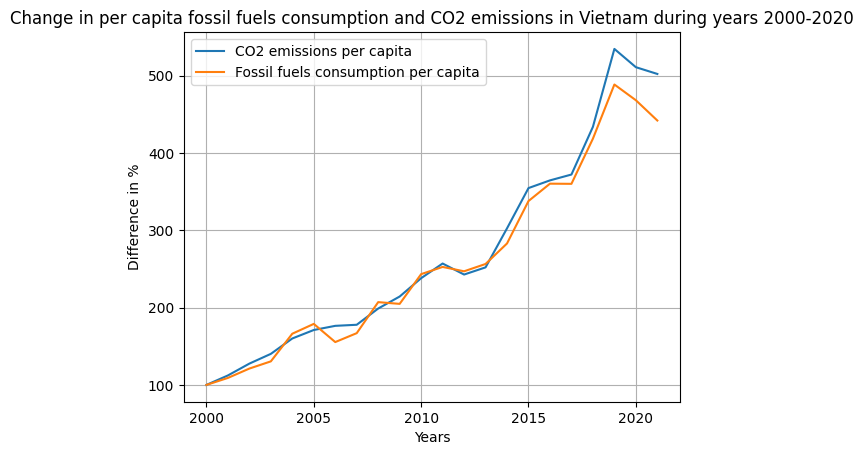

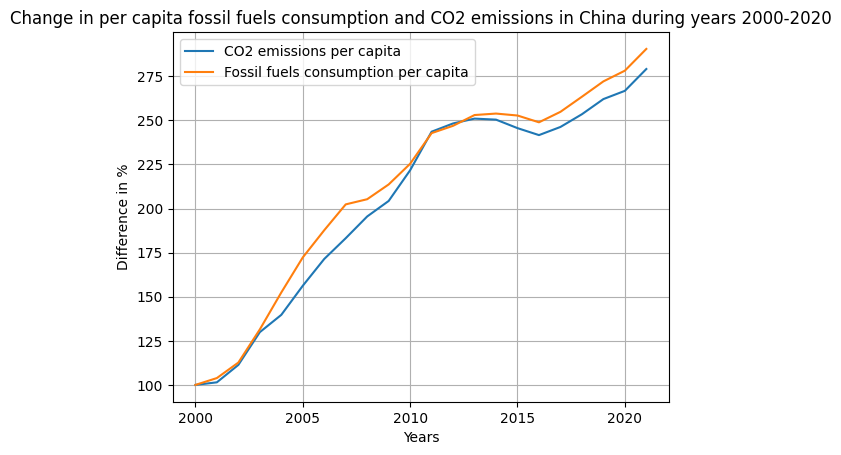

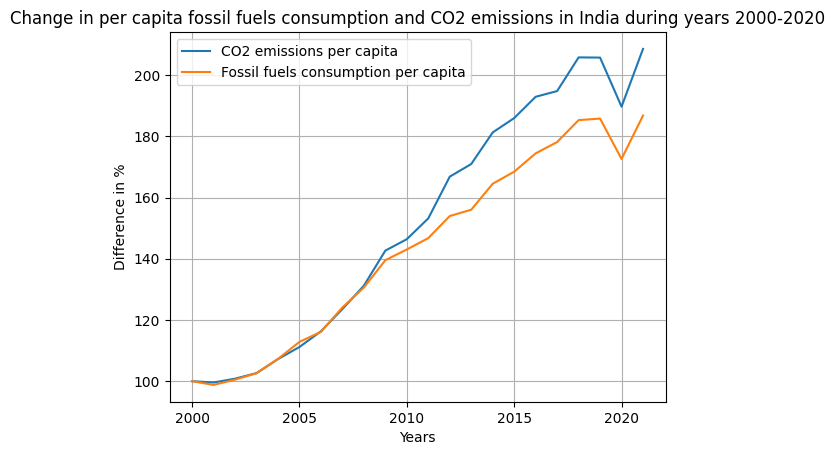


 *** Countries with one of the biggest decreases in fossil energy consumption ***



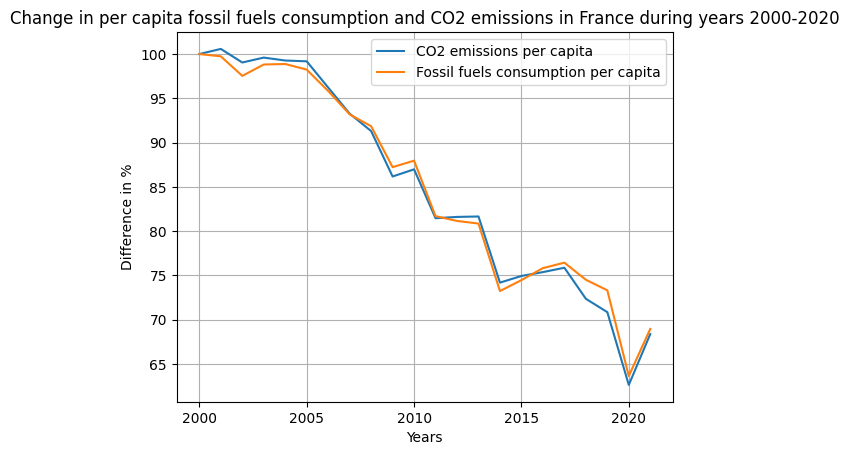

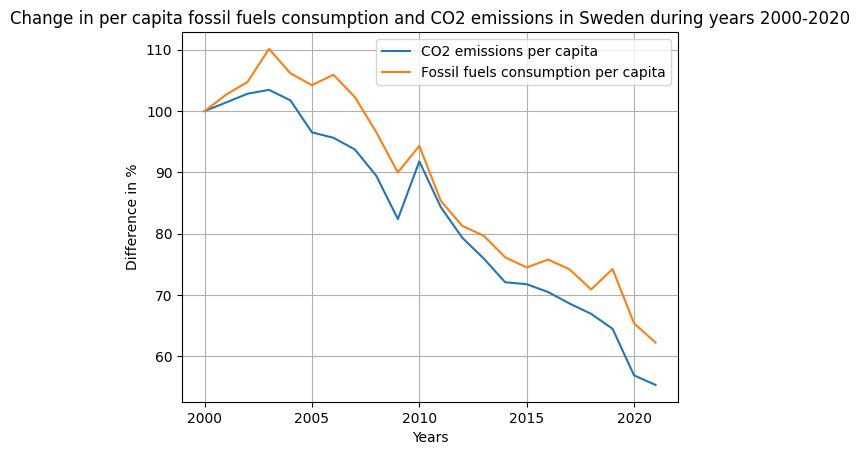

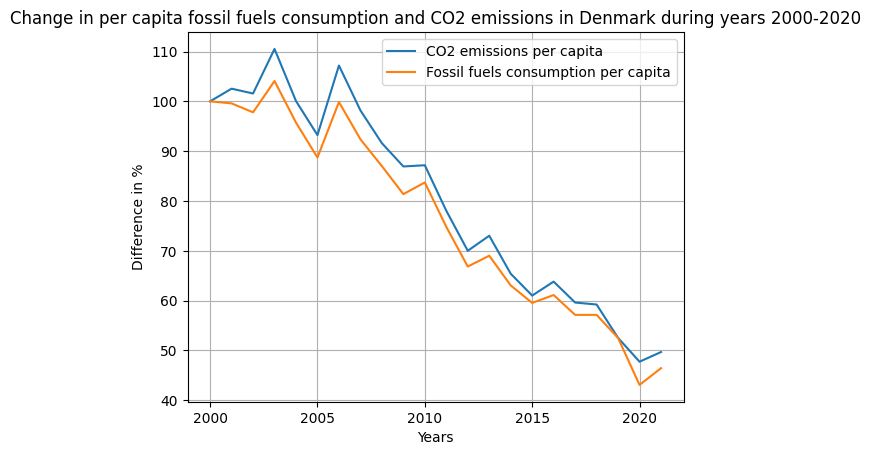

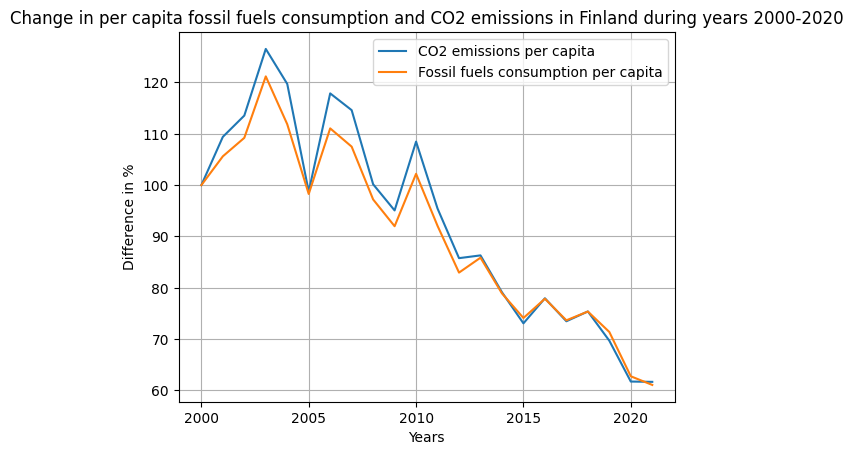

In [112]:
print("*** Countries with one of the biggest increases in fossil energy consumption ***\n")
energy_changes(df9,"Vietnam")
energy_changes(df9,"China")
energy_changes(df9,"India")
print("\n *** Countries with one of the biggest decreases in fossil energy consumption ***\n")
energy_changes(df9,"France")
energy_changes(df9,"Sweden")
energy_changes(df9,"Denmark")
energy_changes(df9,"Finland")

### **10. Renewables energy consumption per capita**

**Inspecting and cleaning data frame**

---



In [117]:
#source: https://ourworldindata.org/grapher/per-capita-low-carbon-vs-gdp
df10 = pd.read_csv("https://raw.githubusercontent.com/MonikaGost/Winc/master/Final_assignment/per-capita-low-carbon-vs-gdp.csv")
df10

,Entity,Code,Year,Low-carbon energy per capita (kWh - equivalent),"GDP per capita, PPP (constant 2017 international $)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1280.46,NaN
2,Afghanistan,AFG,2003,NaN,1292.33,NaN
3,Afghanistan,AFG,2004,NaN,1260.06,NaN
4,Afghanistan,AFG,2005,NaN,1352.32,NaN
...,...,...,...,...,...,...
8772,Zimbabwe,ZWE,2017,NaN,2331.78,NaN
8773,Zimbabwe,ZWE,2018,NaN,2399.62,NaN
8774,Zimbabwe,ZWE,2019,NaN,2203.40,NaN
8775,Zimbabwe,ZWE,2020,NaN,1990.32,NaN


In [118]:
df10.drop(columns=["Code","Continent"], inplace=True)
df10.rename(columns={"Low-carbon energy per capita (kWh - equivalent)":"Low_carbon","GDP per capita, PPP (constant 2017 international $)":"GDP"}, inplace=True)
df10.set_index("Entity",inplace=True)
df10.dropna(inplace=True)
df10

,Year,Low_carbon,GDP
Entity,,,
Algeria,1990,0.02,8828.87
Algeria,1991,0.03,8517.38
Algeria,1992,0.02,8471.53
Algeria,1993,0.04,8109.88
Algeria,1994,0.02,7869.27
...,...,...,...
World,2017,3.24,16156.35
World,2018,3.36,16559.00
World,2019,3.48,16847.46


In [119]:
#Looking at unique values
uv10 = df10.index.unique()
display(len(uv10)) # we have 81 unique 'country' names
display(list(uv10)) # not all of these values are actual cuntries, so I'll remove them from the list

81

['Algeria',
 'Argentina',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Ecuador',
 'Egypt',
 'Estonia',
 'European Union (27)',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'High-income countries',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Kuwait',
 'Latvia',
 'Lithuania',
 'Lower-middle-income countries',
 'Luxembourg',
 'Malaysia',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'North Macedonia',
 'Norway',
 'Oman',
 'Pakistan',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Singapore',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'South Korea',
 'Spain',
 'Sri Lanka',
 'Sweden',
 'Switzerland',
 'Thailand',
 'Trinidad and Tobago',
 'Turkey',
 'Turkmenistan',
 'Ukraine',
 'United Arab E

In [120]:
df10_drop = ['European Union (27)','High-income countries','Lower-middle-income countries','Upper-middle-income countries','World']
df10.drop(index=df10_drop,axis=0,inplace=True)
# We have 76 countries left

In [121]:
df10.Year.unique() # we have a data from years 1990-2021

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

**Adding column with CO2 output per capita. I use previous data frame to merge with (with fossil fuels data).**

---



In [104]:
df10
df10a = pd.merge(df10, df9, how='left', on=['Entity', 'Year'])
df10a.drop(columns="Fossil",inplace=True)

In [105]:
df10a.isnull().sum() # there are a lot of data missing because another table was much bigger.
#Many countries miss low-carbon data or have no access to low-carbon energy sources. Will have to drop these rows
df10a_check = df10a.sort_values(by="CO2", ascending=True)
df10a_check.tail(90)
df10a.dropna(inplace=True)

In [106]:
df10_2021 = df10a.loc[df10a["Year"] == 2021].copy()

**Looking at correlation using Pandas function**

---



In [107]:
df10_2021.drop(columns="Year", inplace=True)
df10corr=df10_2021.corr(numeric_only = True)
df10corr

,Low_carbon,GDP,CO2
Low_carbon,1.00,0.46,0.16
GDP,0.46,1.00,0.42
CO2,0.16,0.42,1.00


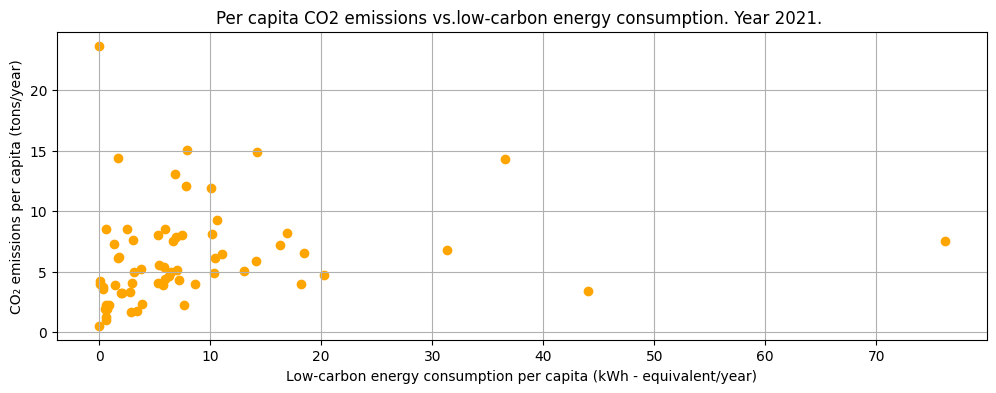

In [108]:
x10=df10_2021['Low_carbon']
y10=df10_2021['CO2']
plt.figure(figsize=(12,4))

plt.scatter(x10,y10 , c = "orange")

plt.xlabel("Low-carbon energy consumption per capita (kWh - equivalent/year)")
plt.ylabel("CO₂ emissions per capita (tons/year)")
plt.title("Per capita CO2 emissions vs.low-carbon energy consumption. Year 2021. ")
plt.grid()


plt.show()

****

**Looking at countries with biggest and smallest renewables consumption**

---



* **I start with calculating biggest changers in energy consumption.**

---



In [ ]:
df10b=df10a.drop(columns=["CO2","GDP"])
df10ren=pd.pivot_table(df10b, values="Low_carbon", index=["Entity"], columns=["Year"]) # produces Nan values
df10ren #  there isquite some data missing for certain years
list(df10ren.isna().sum()) # there is some data missing in 90's but for now want to look only at 1990 and 2021, so remove only these with null values
df10ren.dropna(subset=[1990, 2021], inplace=True)
df10ren["dev_low_carbon"] = (df10ren[2021]/df10ren[1990])*100
df10ren.sort_values(by=["dev_low_carbon"], ascending=False, inplace=True)
df10ren.sort_values(by=[2021,"dev_low_carbon"], ascending=False, inplace=True) # also checking with sorting by 2021 as I want to get to see the biggest consumers
df10ren
display(df10ren.head(10)) # I want to look at Denmark,Finland,Belgium, China
display(df10ren.tail(10)) # I choose from here: Bangladesh,Uzbekistan,Azerbaijan,Switzerland for furhter analysis

* **Plotting results for biggest changers over the years**

---



In [110]:
def lowcarbon_changes (df,country):
        df = df.loc[(df.index == country)].copy()
        df.set_index("Year", inplace=True)
        df["devCO2"] = (df["CO2"]/(df.loc[1990,"CO2"]))*100
        df["dev_low_carbon"] = (df["Low_carbon"]/(df.loc[1990,"Low_carbon"]))*100

        df.fillna(0)
        years = df.index
        CO2 = df["devCO2"]
        lowC= df["dev_low_carbon"]

        plt.plot(years,CO2, label="CO2 emissions per capita")
        plt.plot(years,lowC, label="Low-carbon consumption per capita")

        plt.legend()
        plt.xlabel("Years")
        plt.ylabel("Difference in %")
        plt.title(f"Change in per capita low-carbon energy consumption and CO2 emissions in {country} during years 1990-2021")
        plt.grid()
        plt.show()

*** Countries with one of the biggest increases in low-carbon energy consumption ***



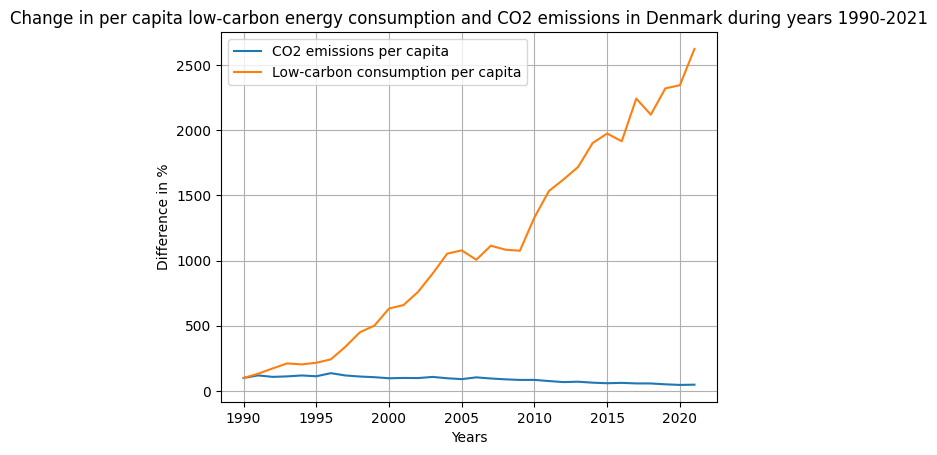

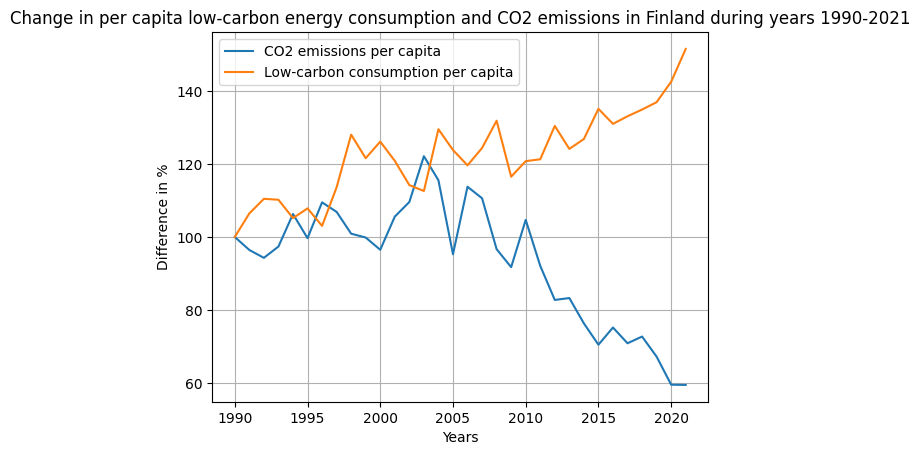

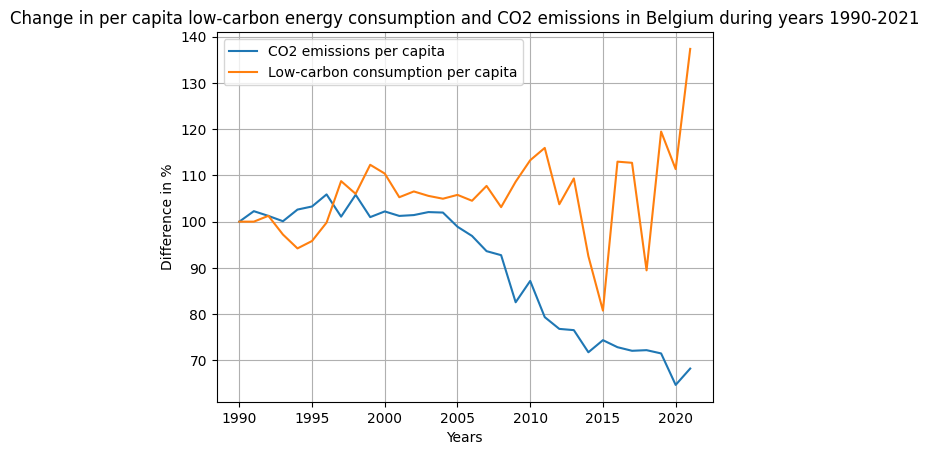

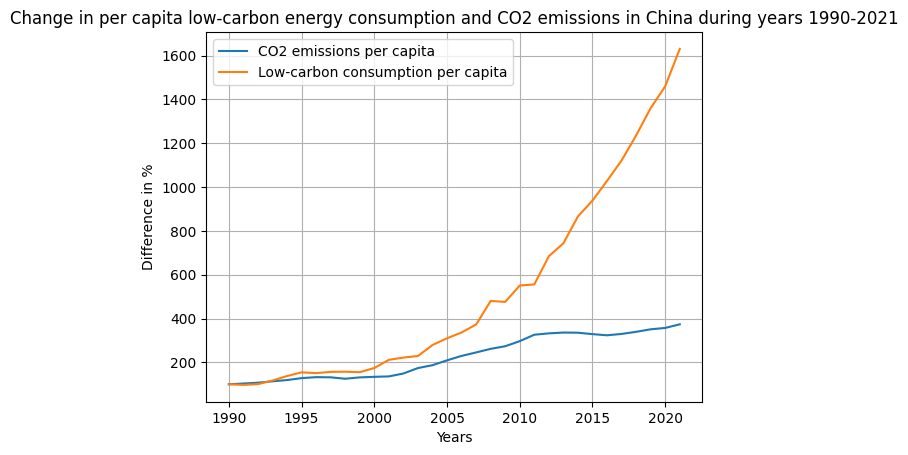


 *** Countries with one of the biggest decreases in low_carbon energy consumption ***



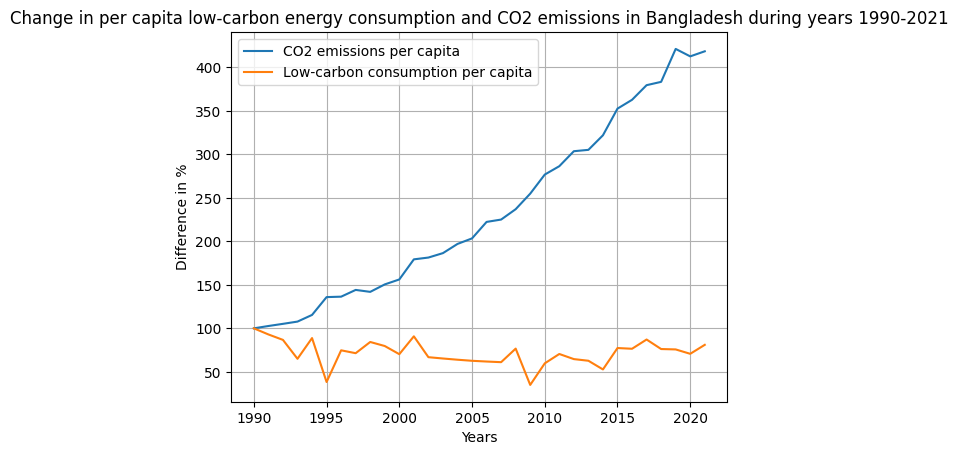

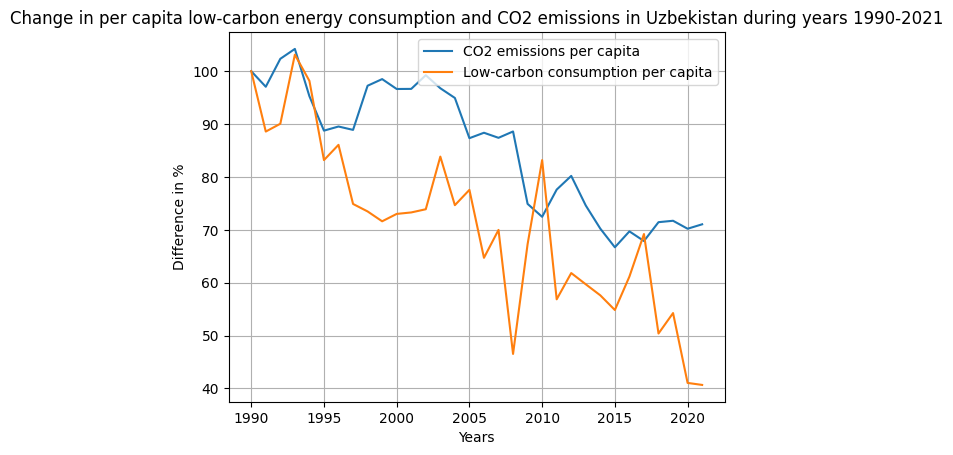

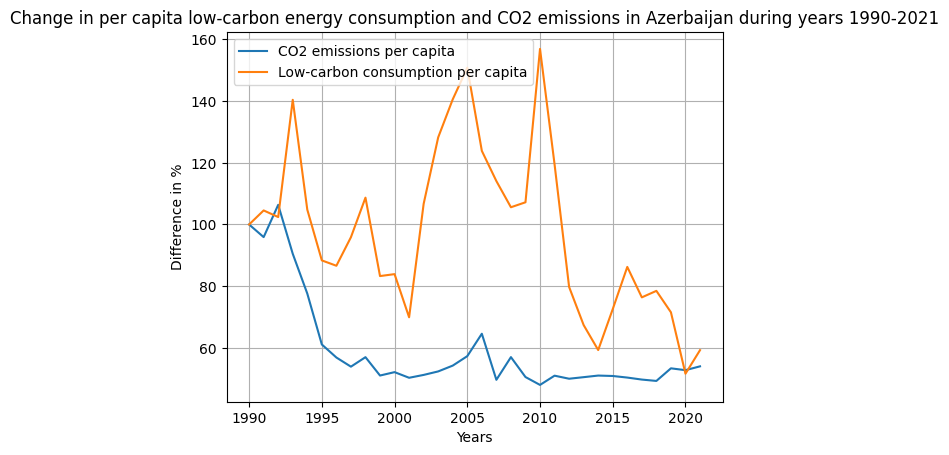

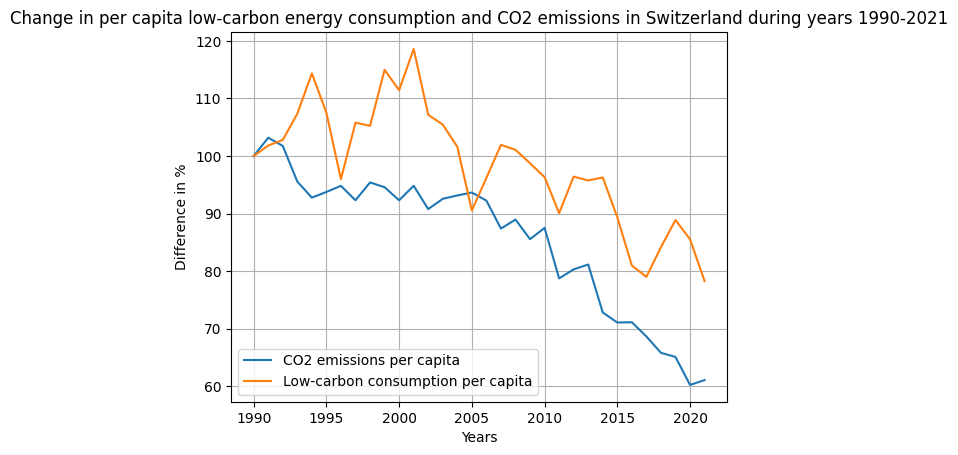

In [111]:
print("*** Countries with one of the biggest increases in low-carbon energy consumption ***\n")
lowcarbon_changes(df10a,"Denmark")
lowcarbon_changes(df10a,"Finland")
lowcarbon_changes(df10a,"Belgium")
lowcarbon_changes(df10a,"China")

print("\n *** Countries with one of the biggest decreases in low_carbon energy consumption ***\n")
lowcarbon_changes(df10a,"Bangladesh")
lowcarbon_changes(df10a,"Uzbekistan")
lowcarbon_changes(df10a,"Azerbaijan")
lowcarbon_changes(df10a,"Switzerland")

### **11. Looking at relation of low-carbon energy consumption per capita and GPD per capita**

---



In [ ]:
# I can use previous data frame for this analysis
df10
df11 = df10.loc[df10["Year"]==2021]
df11

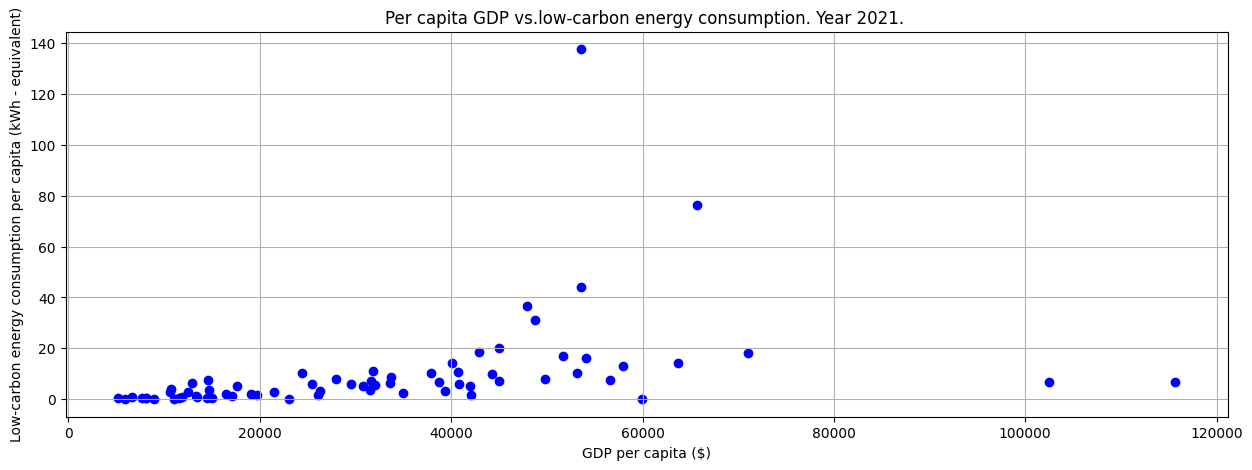

In [123]:
x11=df11['GDP']
y11=df11['Low_carbon']
plt.figure(figsize=(15,5))

plt.scatter(x11,y11 , c = "blue")

plt.xlabel("GDP per capita ($)")
plt.ylabel("Low-carbon energy consumption per capita (kWh - equivalent)")
plt.title("Per capita GDP vs.low-carbon energy consumption. Year 2021. ")
plt.grid()


plt.show()